<a href="https://colab.research.google.com/github/mitresthen/phys117_2021/blob/main/SphaleronsVBlackHoles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sphalerons Black holes

##Imports, mapping, dataset

###Imports

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import math
#from google.colab import drive
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
import matplotlib.ticker as ticker
import statistics

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

print(fastbook.__version__)

from fastai.vision.all import *
from fastai.vision import *
from fastbook import *

import h5py
import pandas as pd
import seaborn as sn
from PIL import Image
from sklearn.metrics import confusion_matrix

matplotlib.rc('image', cmap='YlGnBu')



     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 29.7 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 189 kB 44.4 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 260 kB/s 
0.0.18


###Mapping

In [3]:
colmapper = {
    "typ" : 0,
    "eta" : 1,
    "phi" : 2,
    "pt" : 3,
    "jmass" : 4,
    "ntrk" : 5,
    "btag" : 6,
    "hadem" : 7,
}

objectMapping = {
    0 : "Photon",
    1 : "Electron",
    2 : "Muon",
    3 : "Tau",
    4 : "Jet",
    6 : "MTE"
}

objectMappingReverse = {
    "Photon" : 0,
    "Electron" : 1,
    "Muon" : 2,
    "Tau" : 3,
    "Jet" : 4,
    "MTE" : 6
}

inclusiveObjectMapping = {
    0 : "Photon",
    1 : "Electron",
    2 : "Muon",
    3 : "Tau",
    4 : "Jet",
    6 : "MTE",
    7 : "Total"
}

inclusiveObjectMappingReverse = {
    "Photon" : 0, 
    "Electron" : 1, 
    "Muon" : 2, 
    "Tau" : 3, 
    "Jet" : 4, 
    "MTE" : 6, 
    "Total" : 7
}

###Datasets

In [4]:
class DataSet:                              #Filters and counts number of objects rejected.
  data = []
  def __init__(self,path):
    self.path = path
    self.data = self.__readData()
    self.fileName = Path(self.path).stem
    self.eventType = self.__eventType()
  def __readData(self):
      matrices = []
      countUnder15 = 0
      countUnder20 = 0
      with open(self.path, 'r') as file:
        matrix = []
        for line in file:
          elements = line.split()
          if elements[0] == "#":
            continue
          if elements[0] == "0":
            if len(matrix) != 0:
              matrices.append(matrix)
              matrix = []
            continue
          vector = []
          objType = int(elements[1])
          vector.append(objType)
          for i in range (2, 10):
            elem = float(elements[i])
            vector.append(elem)
          if vector[0] == 0 or vector[0] == 1 or vector[0] == 2:
            if vector[3] > 15:
              matrix.append(vector)
            elif vector[3] <= 15:
              countUnder15 += 1    #count for objects rejected of type photon, electron, muon.
              vector = []
          elif vector[0] == 3 or vector[0] == 4:  
            if vector[3] > 20:
              matrix.append(vector)
            elif vector[3] <= 20:
              countUnder20 += 1   #count for objects rejected of type Tau, Jet.
          else: 
            matrix.append(vector)
            continue
        if len(matrix) != 0: #Add the last object of the event
          matrices.append(matrix)
      print(f'{Path(self.path).stem} count of rejected Photon, Electron, Muon: {countUnder15}')   
      print(f'{Path(self.path).stem} count of rejected Tau, Jet: {countUnder20}')   
      return matrices

  def __eventType(self):
    fileName = self.fileName
    letters = fileName[:2]
    BH = letters == "Bl" or letters == "BH"
    SP = letters == "PP"
    TT = letters == "tt"
    if BH:
      eventType = "blackHole"
    if SP:
      eventType = "sphaleron"
    if TT:
      eventType = "tt_"
    
    return eventType

In [5]:
BlackMaxOutputPath = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BlackMaxOutputFirstRun/BlackMaxOutputFirstRun.lhco"
BlackMaxOutput2Path = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BlackMaxOutputFirstRun/BlackMaxOutputFirstRun2.lhco"
Sph13Path = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/spharelon_events_for_ML/PP13-Sphaleron-THR9-FRZ15-NB33-71-NSUBP5.lhco"
BH_n4_M10 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n4_M10.lhco"
BH_n4_M11 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n4_M11.lhco"
BH_n4_M12 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n4_M12.lhco"
BH_n4_M8 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n4_M8.lhco"
BH_n4_M9 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n4_M9.lhco"
BH_n5_M10 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n5_M10.lhco"
BH_n5_M11 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n5_M11.lhco"
BH_n5_M12 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n5_M12.lhco"
BH_n5_M8 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n5_M8.lhco"
BH_n5_M9 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n5_M9.lhco"
BH_n6_M10 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n6_M10.lhco"
BH_n6_M11 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n6_M11.lhco"
BH_n6_M12 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n6_M12.lhco"
BH_n6_M8 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n6_M8.lhco"
BH_n6_M9 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/BH/BH_n6_M9.lhco"

PP13_Sphaleron_NSUBP50 = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/sphaleron/PP13-Sphaleron-THR9-FRZ15-NB33-60-NSUBP50.lhco"
PP13_Sphaleron_NSUBPALL = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/sphaleron/PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL.lhco"
ttbar = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/ttbar/ttbar.lhco"
ttbar_largejets = "/content/gdrive/MyDrive/Colab Notebooks/Phys117Data/ttbar/ttbar_largejets.lhco"




paths = [
  #BlackMaxOutputPath,
  #BlackMaxOutput2Path,
  #Sph13Path,
  BH_n4_M10,
  #BH_n4_M11,
  #BH_n4_M12,
  BH_n4_M8,
  #BH_n4_M9,
  #BH_n5_M10,
  #BH_n5_M11,
  #BH_n5_M12,
  #BH_n5_M8,
  #BH_n5_M9,
  #BH_n6_M10,
  #BH_n6_M11,
  BH_n6_M12,
  #BH_n6_M8,
  #BH_n6_M9,
  #PP13_Sphaleron_NSUBP50,
  PP13_Sphaleron_NSUBPALL,
  ttbar,
  ttbar_largejets,
  ]
dataSets = []

for path in paths:
  dataset = DataSet(path)
  dataSets.append(dataset)
  print(f"Number of events in {dataset.fileName}: {len(dataset.data)}")
print(dataSets)


BH_n4_M10 count of rejected Photon, Electron, Muon: 66
BH_n4_M10 count of rejected Tau, Jet: 0
Number of events in BH_n4_M10: 9985
BH_n4_M8 count of rejected Photon, Electron, Muon: 60
BH_n4_M8 count of rejected Tau, Jet: 0
Number of events in BH_n4_M8: 9998
BH_n6_M12 count of rejected Photon, Electron, Muon: 72
BH_n6_M12 count of rejected Tau, Jet: 0
Number of events in BH_n6_M12: 9643
PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL count of rejected Photon, Electron, Muon: 98
PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL count of rejected Tau, Jet: 0
Number of events in PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL: 10000
ttbar count of rejected Photon, Electron, Muon: 1938
ttbar count of rejected Tau, Jet: 0
Number of events in ttbar: 100000
ttbar_largejets count of rejected Photon, Electron, Muon: 1026
ttbar_largejets count of rejected Tau, Jet: 0
Number of events in ttbar_largejets: 100000
[<__main__.DataSet object at 0x7f54015addd0>, <__main__.DataSet object at 0x7f53fea10410>, <__main__.DataSet object

###Test if objects low PT are filtered

In [6]:
#@title Default title text
def testFilter():

    unfilteredObjectList15 = []
    unfilteredObjectList20 = []
    unfilteredObjectDictMTE15 = {}
    unfilteredObjectDictMTE20 = {}

    filteredDictMTE = {}

    for dataSet in dataSets:
      unfilteredObjects15 = 0
      unfilteredObjects20 = 0
      unfilteredObjectsMTE15 = 0
      unfilteredObjectsMTE20 = 0
      filteredMTE = 0

      for matrix in dataSet.data:
        for obj in matrix:        

          condb = obj[colmapper["pt"]] <= 15
          condc = obj[colmapper["pt"]] <= 20
          condd = obj[colmapper["pt"]] > 20
          cond1 = obj[colmapper["typ"]] == 0
          cond2 = obj[colmapper["typ"]] == 1
          cond3 = obj[colmapper["typ"]] == 2
          cond4 = obj[colmapper["typ"]] == 3
          cond5 = obj[colmapper["typ"]] == 4
          cond6 = obj[colmapper["typ"]] == 6

          if (cond1 or cond2 or cond3) and condb:   #Check if photons, electrons, muons are filtered
            unfilteredObjects15 += 1

          if (cond4 or cond5) and condc:            #Check if taus, jets are filtered
            unfilteredObjects20 += 1

          if cond6 and condb:                      
            unfilteredObjectsMTE15 += 1

          if cond6 and condc:
            unfilteredObjectsMTE20 += 1

          if cond6 and condd:
            filteredMTE += 1

      unfilteredObjectDictMTE15[dataSet.fileName] = unfilteredObjectsMTE15
      unfilteredObjectDictMTE20[dataSet.fileName] = unfilteredObjectsMTE20
      filteredDictMTE[dataSet.fileName] = filteredMTE

      unfilteredObjectList15.append(unfilteredObjects15)
      unfilteredObjectList20.append(unfilteredObjects20)

    return unfilteredObjectList15, unfilteredObjectList20, unfilteredObjectDictMTE15, unfilteredObjectDictMTE20, filteredDictMTE


def testMTE():
    for dataSet in dataSets:

      countMTELess25 = 0
      for matrix in dataSet.data:
        for obj in matrix:

          cond1 = obj[colmapper["typ"]] == 6
          cond2 = obj[colmapper["pt"]] <= 20

          if cond1 and cond2:
            countMTELess25 += 1
      
      print(f"{dataSet.fileName}, has number of MTE objects less than 25GeV: {countMTELess25}")

def testAgain():

  unfilteredDictMTE15 = {}

  for dataSet in dataSets:
    unfilteredMTE15 = 0
    for matrix in dataSet.data:
      for obj in matrix:
        if obj[colmapper["typ"]] != 6:
          if obj[colmapper["pt"]] <= 15:
            unfilteredMTE15 += 1
    
    unfilteredDictMTE15[dataSet.fileName] = unfilteredMTE15

  return unfilteredDictMTE15

    

      
            
#testMTE()
#testFilter()
testAgain()

{'BH_n4_M10': 0,
 'BH_n4_M8': 0,
 'BH_n6_M12': 0,
 'PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL': 0,
 'ttbar': 0,
 'ttbar_largejets': 0}

## Plotting...

In [7]:
# def getZBoson(event):
#   bosons = []
#   muons = []
#   for obj in event:
#     if event[colmapper["typ"]] == objectMappingReverse["Muon"]:
#       muons.append(obj)
#   if len(muons) < 2:
#     return bosons
#   largestPosEnergy = -10000
#   largestPos = muons[0]
#   largestNegEnergy = -10000
#   largestNeg = muons[0]
#   for muon in muons:
#     if muon[colmapper["ntrk"]] > 0:
#       if muon[colmapper["pt"]] > largestPosEnergy:
#         largestPosEnergy = muon[colmapper["pt"]]
#         largestPos = muon
#     else:
#       if muon[colmapper["pt"]] > largestNegEnergy:
#         largestNegEnergy = muon[colmapper["pt"]]
#         largestNeg = muon
#   if largestPosEnergy > 0 and largestNegEnergy > 0:
#     #invariantMass = largestPos[colmapper["jmass"]] + largestNeg[colmapper["jmass"]]
#     invariantMass = (2*largestPos[colmapper["jmass"]]*largestNeg[colmapper["jmass"]])*(math.cosh(largestPos[colmapper["eta"]] - largestNeg[colmapper["eta"]]) - cos(largestPos[colmapper["phi"]] - largestNeg[colmapper["eta"]]))

#     bosons.append(invariantMass)
#     return bosons
  
# def getZBosons():
#   for dataSet in dataSets:
#     ZBosons = []
#     for event in dataSet.data:
#       ZBosons.append(getZBoson(event))
#     print(f"ZBosons: {dataSet.fileName}: {ZBosons}")

# getZBosons()

In [8]:

def getObjectCounts(matrix):
  maxObjects = 0
  for matrice in matrix:
    if(len(matrice) > maxObjects):
      maxObjects = len(matrice)
  counts = [0] * (maxObjects+1)
  for matrice in matrix:
      counts[len(matrice)] += 1
  return counts


In [9]:
def getSpecificObjectCounts(matrix, objectType):
  maxObjects = 0
  for event in matrix:
    sumOfThisObject = 0
    for obj in event:
      if obj[0] == int(objectType):
        sumOfThisObject += 1
    if sumOfThisObject > maxObjects:
      maxObjects = sumOfThisObject
  #print(f'Found event with max {maxObjects} of type {objectMapping[objectType]}')
  counts = [0] * (maxObjects+1)
  for event in matrix:
    sumOfThisObject = 0
    for obj in event:
      if obj[0] == int(objectType):
        sumOfThisObject += 1
    counts[sumOfThisObject] += 1
  return counts


In [10]:
def plotObjectDistribution(binnedObjects, title):
  xVals = list(range(0,len(binnedObjects)))
  if(len(xVals) != len(binnedObjects)):
    print("Size different")
  plt.bar(xVals, binnedObjects)
  plt.title(title)
  plt.show()

In [11]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, alignment="center"):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    final_width = bar_width * single_width

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = 0
        if alignment == "center":
          x_offset += (i - n_bars / 2) * final_width  + final_width / 2
        elif alignment == "right":
            x_offset += i*final_width + final_width / 2
        
        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=final_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(), bbox_to_anchor=(1, 1.4))


def comparativePlot(binnedObjectSets, title):
  fig, ax = plt.subplots()
  dataDict = {}
  for filename, binnedObjects in binnedObjectSets:
    dataDict[filename] = binnedObjects

  bar_plot(ax, dataDict, total_width=.8, single_width=.9)
  plt.title(title)
  plt.xlabel('nr of particles per event')
  plt.ylabel('Probability')
  plt.show()

In [12]:
def normalizeObjectCounts(objectCounts):
  nrOfObjects = sum(objectCounts)
  return [i/nrOfObjects for i in objectCounts]

def normalizeObjectCounts2d(objectCounts2d):
  normalizedObjectCounts2d = []
  for objectCounts in objectCounts2d:
    normalizedObjectCounts = normalizeObjectCounts(objectCounts)
    normalizedObjectCounts2d.append(normalizedObjectCounts)
  return normalizedObjectCounts2d
    
def normalizeObjectCountsCutPlot(objectCountsCut, objectCounts):
  nrOfObjects = sum(objectCounts)
  return [i/nrOfObjects for i in objectCountsCut]

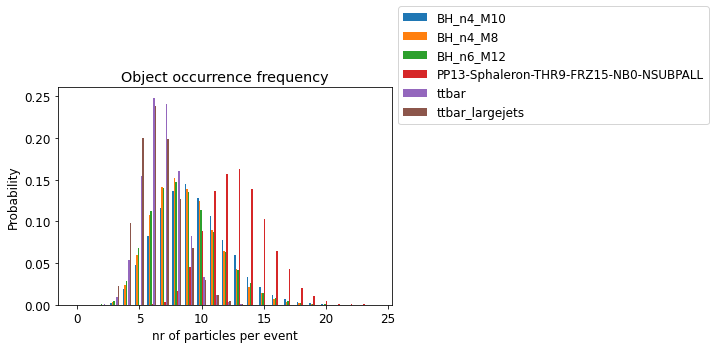

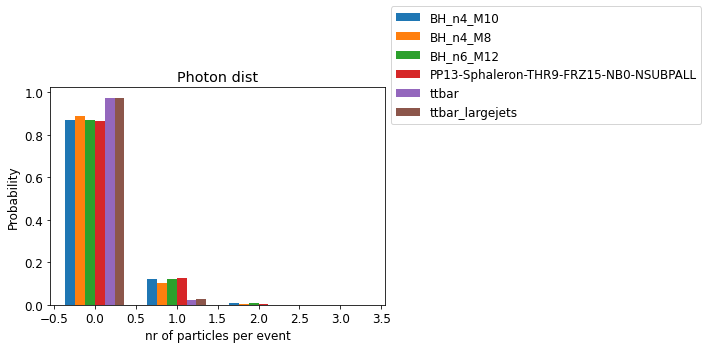

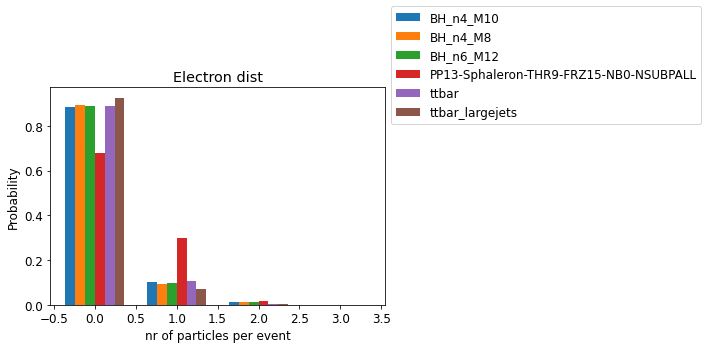

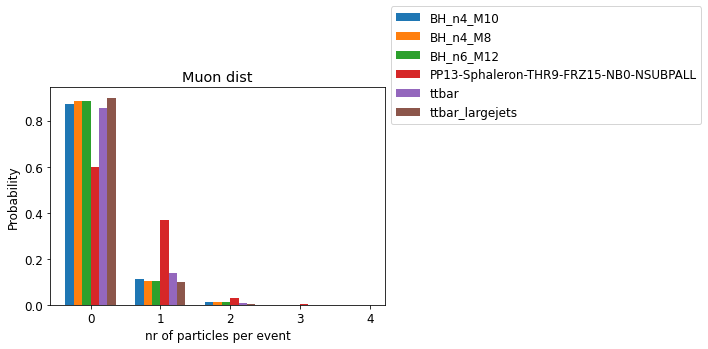

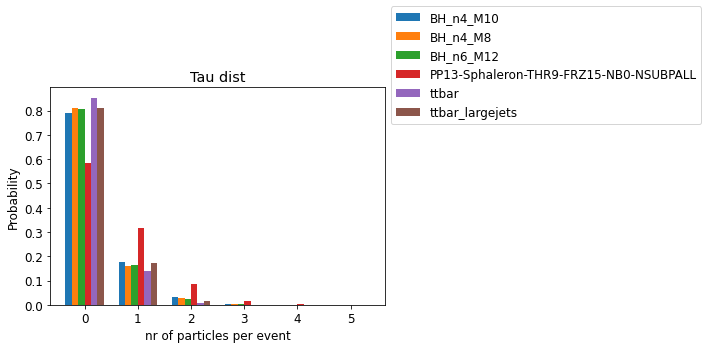

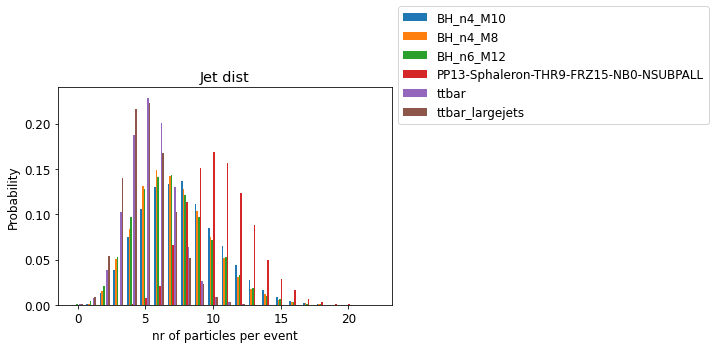

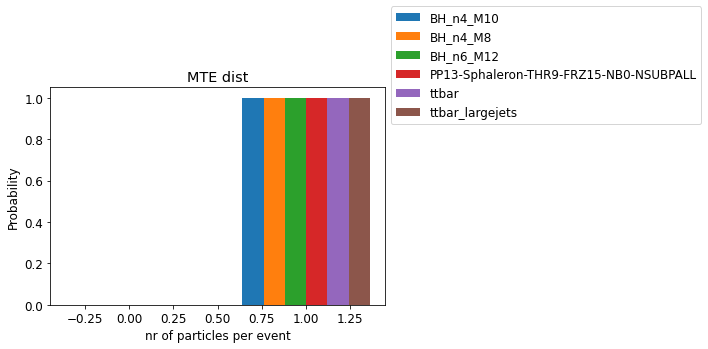

In [13]:
def plotComparativeTotalObjectDistribution():
  objectCounts=[]
  for dataSet in dataSets:
    objectCounts.append((dataSet.fileName, normalizeObjectCounts(getObjectCounts(dataSet.data))))
  comparativePlot(objectCounts, "Object occurrence frequency")

def plotComparativeSpecificObjectDistribution():
    for objectType in objectMapping:
        specificCounts = []
        for dataSet in dataSets:
          specificCounts.append((dataSet.fileName, normalizeObjectCounts(getSpecificObjectCounts(dataSet.data, objectType))))
        comparativePlot(specificCounts, f'{objectMapping[objectType]} dist')

plotComparativeTotalObjectDistribution()
plotComparativeSpecificObjectDistribution()

In [14]:
noEmptyObjects = False         #Removes datapoints with PT = 0.
useSumMultiplicity = False     #If True, energy of each objecttype is summed per event.
normalizePTPlot = True        #Probabillity density plot.

def getSpecificObjectEnergy(matrices,objectType):
  pTListSpecific = []
  for matrix in matrices:
    for obj in matrix:
      if obj[0] == int(objectType):
        pTListSpecific.append(float(obj[3]))
  return pTListSpecific 

def getTotalObjectEnergyPerEvent(matrices, objectType):   #sums energy for objects of same type in an event. Gives lots of 0 values. Kan sikkert fjernes
  pTTotal = []
  for matrix in matrices:
    pTForObjType = 0
    for obj in matrix:
      if obj[0] == int(objectType):
        pTForObjType += float(obj[3])
    if noEmptyObjects == True and pTForObjType != 0:
      pTTotal.append(pTForObjType)
    elif noEmptyObjects == False:
      pTTotal.append
    else: continue
  return pTTotal

def sumPT(matrices):
  pTListTotal = []
  for matrix in matrices:
    pT = 0
    for obj in matrix:
      pT += float(obj[3])
    pTListTotal.append(pT) 
  return pTListTotal

def sumPTCustom(matrices, objectTypes):  #Kan erstatte sumPT, denne 
    """ sumPTCustom(matrices, objectTypes),  sum function for PT for specified objectTypes
        objectTypes: List of objectTypes to be used.
        Returns: List of total PT of each event, counting only for specified objectTypes. Gives 0 values for events without PT"""
    pTListTotal = []
    for matrix in matrices:
      pTList = 0
      for obj in matrix:
        if obj[0] in objectTypes:
          pTList += obj[3]
      pTListTotal.append(pTList)
    return pTListTotal
      


Plot av MTE til total PT ratio:
For hver event:
1. finn total pt inkludert mte sin pt
2. finn mte for event
3. finn ratio = mte/totalPt og lagre slik at vi vet hvilken ratio som hører til hvilken event.
4. lag histogram

##PT plots

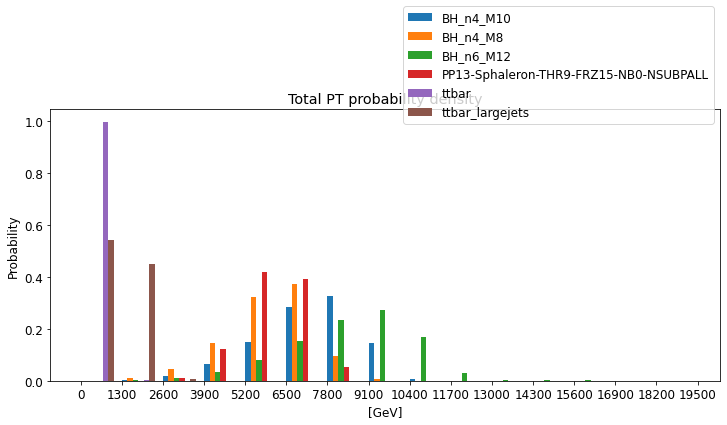

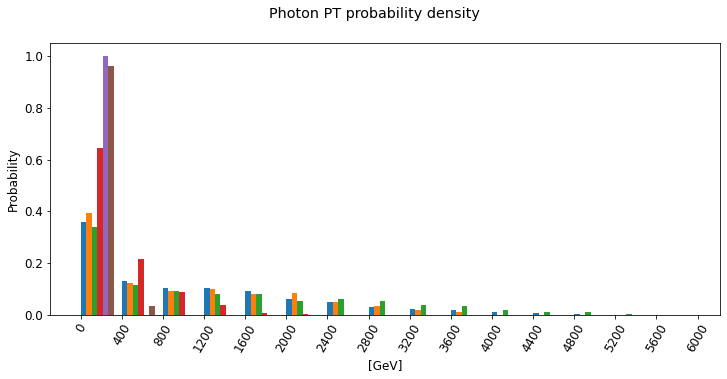

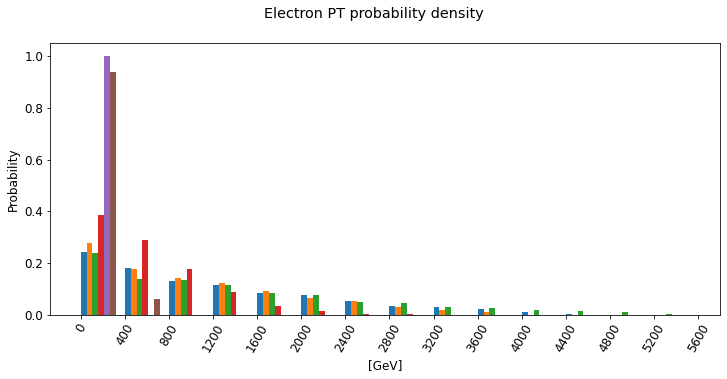

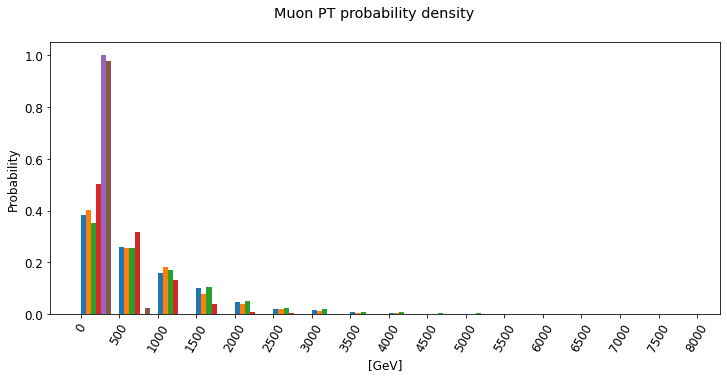

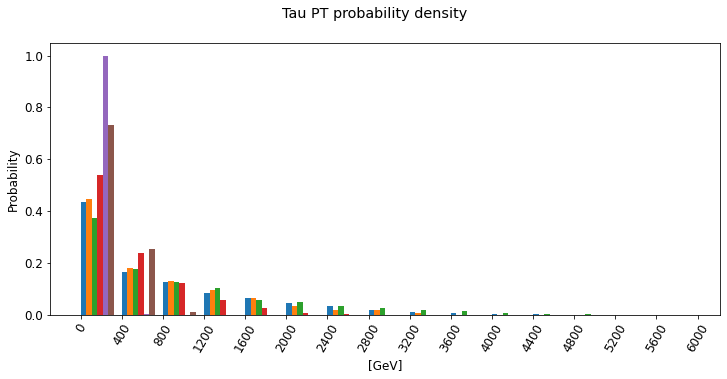

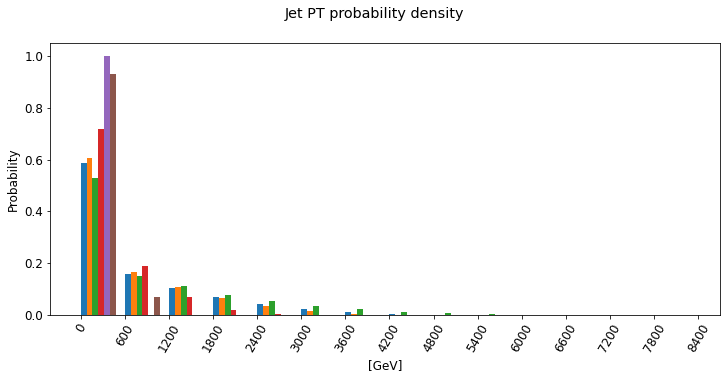

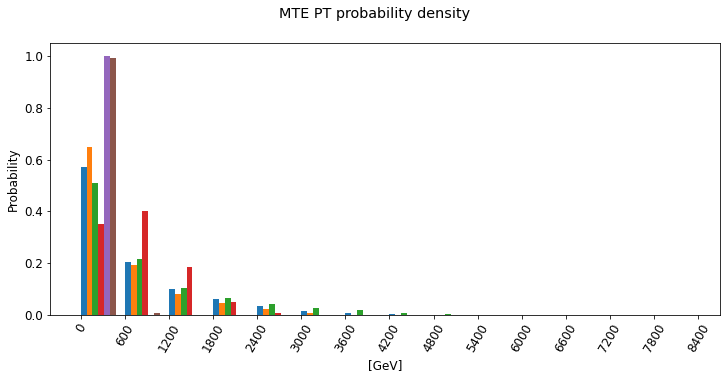

In [15]:
def maxValueOfElementInLists(lists):
  """Returns the max value of all elements in all lists"""
  maxValue = max(max(list) for list in lists)
  return maxValue



def leastMaxValueOfElementInLists(lists):
  """Returns the lowest value of all lists maximum values"""
  leastMaxValue = min(max(list) for list in lists)
  return leastMaxValue



def createBins(maxValue, numberOfBins = 15):
  #not necessarily the real number of bins, a bit clunky
  cond1 = maxValue < 100*numberOfBins
  cond2 = maxValue >= 100*numberOfBins
  if cond1: binLen = round(maxValue/numberOfBins, -1)
  if cond2: binLen = round(maxValue/numberOfBins, -2)
  
  bins = np.arange(0,maxValue, binLen)
  bins = bins.astype(int)
  return bins



def normalizeListToHist(list, bins, cutPlot):
  hist, bins = np.histogram(list, bins)
  hist1, bins1 = np.histogram(list)
  if cutPlot:
    normalizedHist = normalizeObjectCountsCutPlot(hist, hist1)
  else:
    normalizedHist = normalizeObjectCounts(hist)
  return normalizedHist



def preparePTLists(objectType, useSumPT, cutPlot):
  """
  preparePTLists(useSumPT, cutPlot)
  useSumPT: Conditional statement, True if all objects in event is counted, False if not.
  cutPlot: Contidional statement, True if plot is to be scaled to the histogram with fewest bins, False shows all bins.
  """

  PTLists = []

  if useSumPT:
    for dataSet in dataSets:
      PTLists.append(sumPT(dataSet.data))

  else:
    for dataSet in dataSets:
      PTLists.append(getSpecificObjectEnergy(dataSet.data, objectType))


  if cutPlot:
    maxValue = leastMaxValueOfElementInLists(PTLists)
  else:
    maxValue = maxValueOfElementInLists(PTLists)

  bins = createBins(maxValue)
  normalizedHistLists = []

  for PTList in PTLists:
    normalizedHistLists.append(normalizeListToHist(PTList, bins, cutPlot))
    
  PTDict = {}
  for i, dataSet in enumerate(dataSets):
    PTDict[dataSet.fileName] = normalizedHistLists[i]
  return PTDict, bins



def plotPTHistograms():

  def stdLabel():
    plt.xlabel("[GeV]")
    plt.ylabel("Probability")

  objectType = 7  
  useSumPT = True
  cutPlot = False

  figure1 = plt.figure(figsize = (12,5))
  ax1 = plt.subplot(111)
  PTDict, bins = preparePTLists(objectType, useSumPT, cutPlot)
  bar_plot(ax1, PTDict, alignment='right')
  plt.title("Total PT probability density")
  ax1.set_xticks(np.arange(len(bins)))
  ax1.set_xticklabels(bins)
  ax1
  stdLabel()

  for objectType in inclusiveObjectMapping: 

    if inclusiveObjectMapping[objectType] == "Total": continue
    
    fig = plt.figure(figsize=(12,5))
    num = fig.number

    fig, ax2 = plt.subplots(1,1,num=num)                           # Add for no cutoff plots
    # fig, (ax1, ax2) = plt.subplots(1,2,num=num)                   #Remove for comparing sphaleron events
    plt.suptitle(f'{objectMapping[objectType]} PT probability density')
    stdLabel()

    useSumPT = False

    # PTDict, bins = preparePTLists(objectType, useSumPT, True)     #Remove for comparing sphaleron events
    # bar_plot(ax1, PTDict, legend=False, alignment='right')

    # ax1.set_xticks(np.arange(len(bins)))
    # ax1.set_xticklabels(bins, rotation=60)

    PTDict, bins = preparePTLists(objectType, useSumPT, False)
    bar_plot(ax2, PTDict, legend=False, alignment='right')
    ax2.set_xticks(np.arange(len(bins)))
    ax2.set_xticklabels(bins, rotation=60)

plotPTHistograms()

## Plots Reworked


 

ObjectDistributions

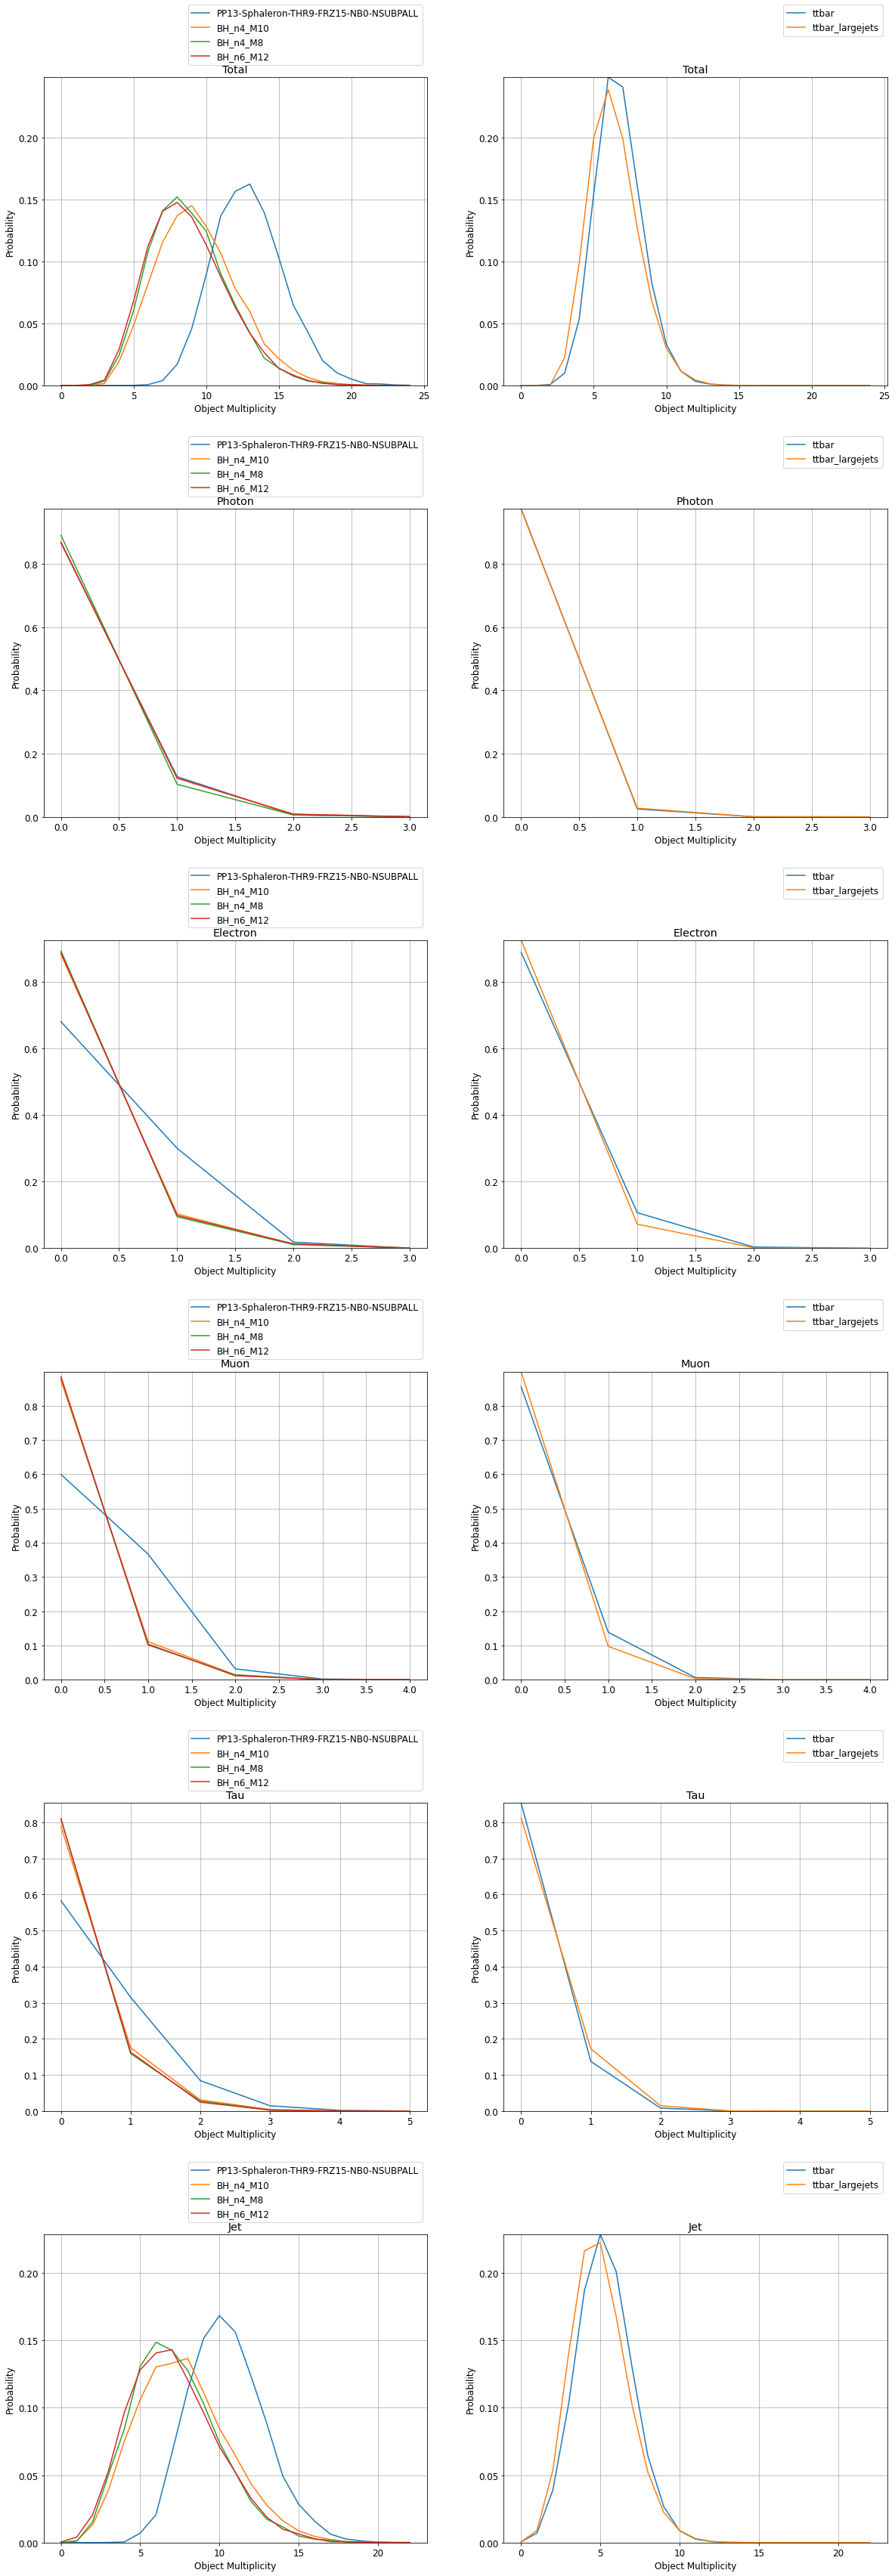

In [16]:
def plotObjectDistributionReworked():

  def objectsDist(objectTypes):
    counts = []
    for objTypIdx in range(len(objectTypes)):
      countsForObjTyp = []
      if objectTypes[objTypIdx] == 7:
        for dataSetIdx in range(len(dataSetsOrdered)):
          objectCounts = getObjectCounts(dataSetsOrdered[dataSetIdx].data)
          countsForObjTyp.append(objectCounts)
      if objectTypes[objTypIdx] != 7:
        for dataSetIdx in range(len(dataSetsOrdered)):
          objectCounts = getSpecificObjectCounts(dataSetsOrdered[dataSetIdx].data, objectTypes[objTypIdx])
          countsForObjTyp.append(objectCounts) 
      counts.append(countsForObjTyp)
    return counts

  def dataSetsOrder():

    dataSetsOrdered = []
    
    for i in range(len(dataSets)):
      if dataSets[i].eventType == "sphaleron":
        dataSetsOrdered.append(dataSets[i])

    for i in range(len(dataSets)):
      if dataSets[i].eventType != "sphaleron":
        dataSetsOrdered.append(dataSets[i])

    return dataSetsOrdered

  def plotObjDist(counts, objectTypes):

    nrPlots = 4
    nrRows = len(objectTypes)
    nrCols = math.ceil(len(dataSetsOrdered)/nrPlots)

    fig = plt.figure(figsize=(nrCols*10,nrRows*10))
    axs = fig.subplots(nrRows, nrCols)
    
    for objTypIdx in range(len(objectTypes)):

      maxBins = 0
      for dataSetIdx in range(len(dataSetsOrdered)):
        binsNr = len(counts[objTypIdx][dataSetIdx])
        if binsNr > maxBins: maxBins = binsNr

      for dataSetIdx in range(len(dataSetsOrdered)):
        cnts = counts[objTypIdx][dataSetIdx]
        if len(cnts) < maxBins:
          extraBins = maxBins - len(cnts)
          for i in range(extraBins):
            counts[objTypIdx][dataSetIdx].append(0)

      binsNotEqual = False
      for dataSetIdx in range(len(dataSetsOrdered)):
        if len(counts[objTypIdx][dataSetIdx]) != maxBins: binsNotEqual = True
      if binsNotEqual: print(f"Number of bins not equal")
      
      for dataSetIdx in range(len(dataSetsOrdered)):
        counts[objTypIdx][dataSetIdx] = normalizeObjectCounts(counts[objTypIdx][dataSetIdx])

    colNrs = []
    for dataSetIdx in range(len(dataSetsOrdered)):
      colNr = dataSetIdx//nrPlots
      colNrs.append(colNr)

    yLims = []
    for objTypIdx in range(len(objectTypes)):
      yLim = 0
      for dataSetIdx in range(len(dataSetsOrdered)):
        maxVal = max(counts[objTypIdx][dataSetIdx])
        if maxVal > yLim: yLim = maxVal
      yLims.append(yLim)
    

    for objTypIdx in range(len(objectTypes)):
      cond1 = len(dataSetsOrdered) > nrPlots
      cond2 = len(dataSetsOrdered) <= nrPlots
      if cond1:
        for dataSetIdx in range(len(dataSetsOrdered)):
          axs[objTypIdx, colNrs[dataSetIdx]].plot(range(len(counts[objTypIdx][dataSetIdx])), counts[objTypIdx][dataSetIdx], label=dataSetsOrdered[dataSetIdx].fileName)
          axs[objTypIdx, colNrs[dataSetIdx]].legend(bbox_to_anchor=(1, 1.25))
          plt.subplots_adjust(hspace = 0.4)
          axs[objTypIdx, colNrs[dataSetIdx]].set_ylim(bottom = 0, top = yLims[objTypIdx])
          axs[objTypIdx, colNrs[dataSetIdx]].grid(b = True, which = 'both')
          axs[objTypIdx, colNrs[dataSetIdx]].set_xlabel('Object Multiplicity')
          axs[objTypIdx, colNrs[dataSetIdx]].set_ylabel('Probability')
          axs[objTypIdx, colNrs[dataSetIdx]].set_title(f'{inclusiveObjectMapping[objectTypes[objTypIdx]]}')

      if cond2:
        for dataSetIdx in range(len(dataSetsOrdered)):
          axs[objTypIdx].plot(range(len(counts[objTypIdx][dataSetIdx])), counts[objTypIdx][dataSetIdx], label=dataSetsOrdered[dataSetIdx].fileName)
          axs[objTypIdx].legend(bbox_to_anchor=(1, 1.25))
          plt.subplots_adjust(hspace = 0.4)
          axs[objTypIdx].set_ylim(bottom = 0, top = yLims[objTypIdx])
          axs[objTypIdx].grid(b = True, which = 'both')
          axs[objTypIdx].set_xlabel('Object Multiplicity')
          axs[objTypIdx].set_ylabel('Probability')
          axs[objTypIdx].set_title(f'{inclusiveObjectMapping[objectTypes[objTypIdx]]}')

  objectTypes = [7, 0, 1, 2, 3, 4]
  dataSetsOrdered = dataSetsOrder()
  counts = objectsDist(objectTypes)
  plotObjDist(counts, objectTypes)

plotObjectDistributionReworked()



PT Plots

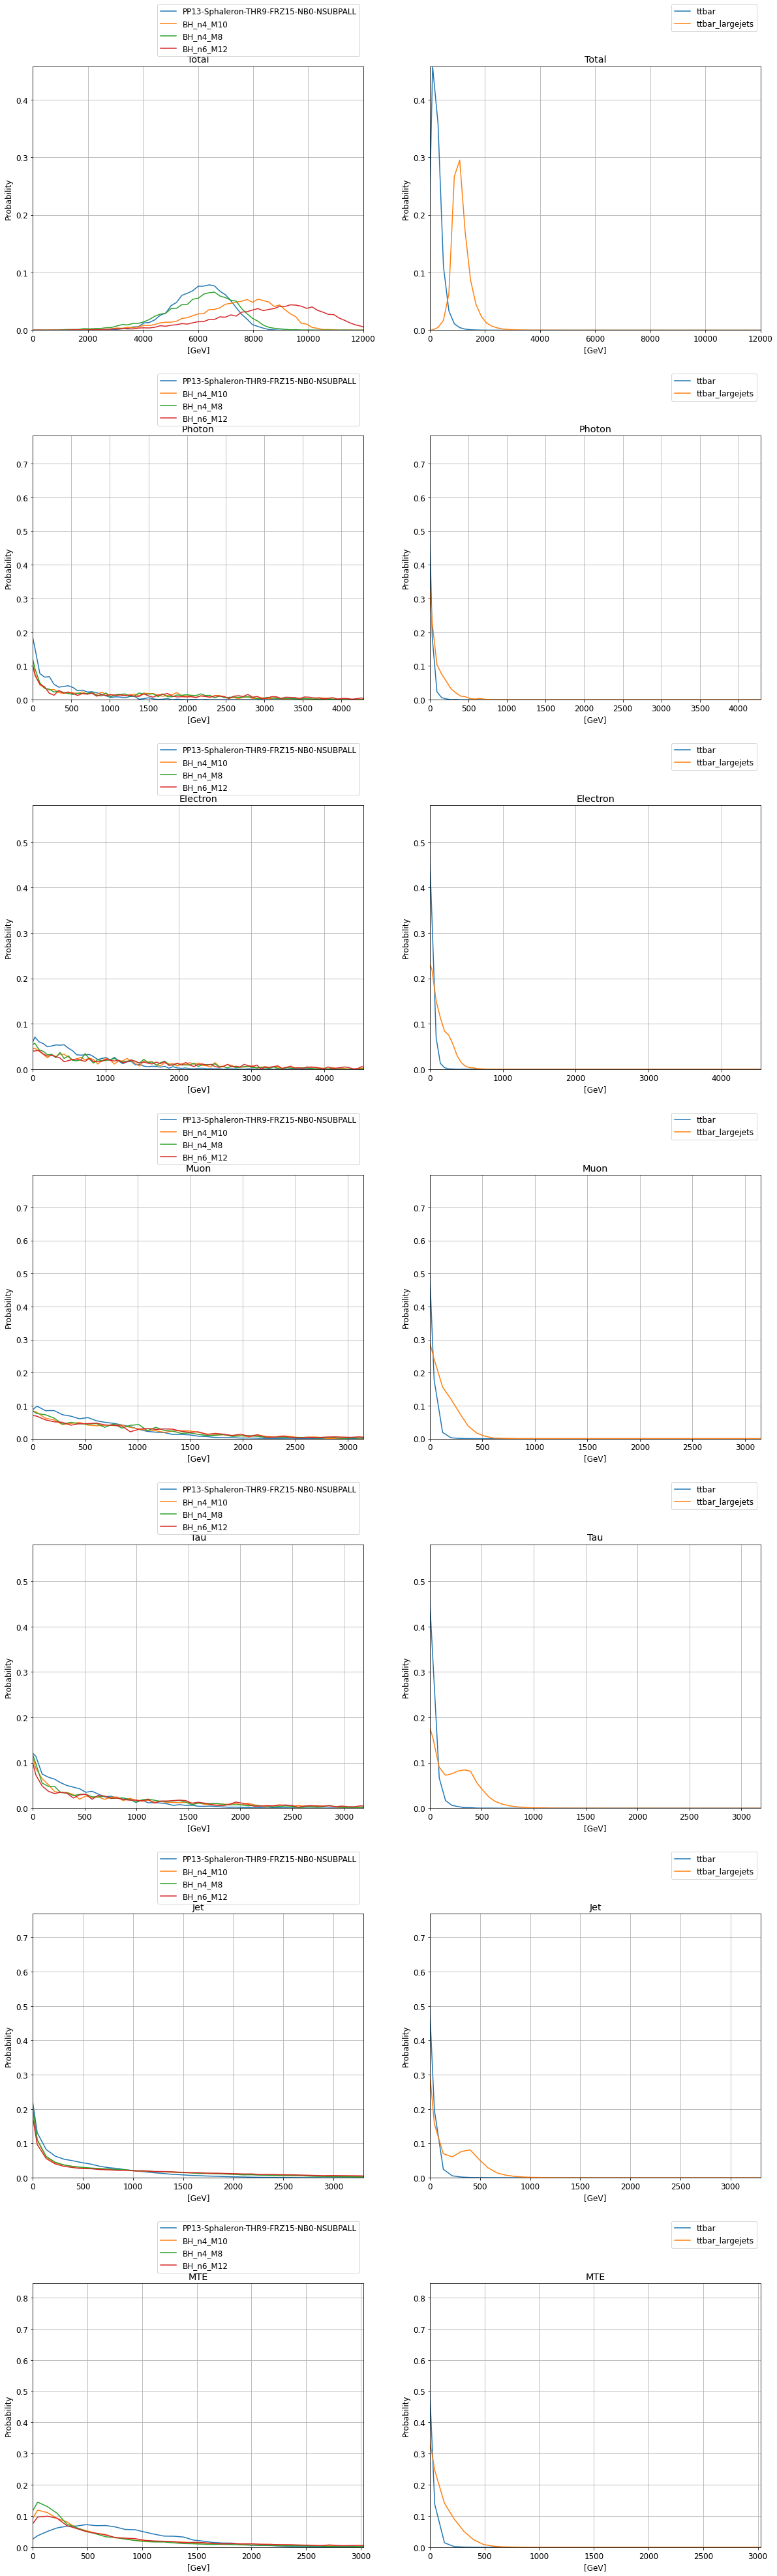

In [17]:
def makeData():

  """Creates data for plotting with createFigure(). 
  Returns 3dim list, with objecttype outer, dataset 2nd, PTList 3rd. First 
  objecttype is total PT""" 

  PTDict = {}

  for objectType in inclusiveObjectMapping:
    for dataSet in dataSets:
      if objectType == 7:

        PTDict[objectType, dataSet.fileName] = sumPT(dataSet.data)

      else: PTDict[objectType, dataSet.fileName] = getSpecificObjectEnergy(dataSet.data, objectType)

  return PTDict

def findMaxValues(valueDict):
  maxValDict = {}
  maxValAll = 0
  
  for key in valueDict:
    maxVal = max(valueDict[key])
    maxValDict[key] = maxVal
    if maxValAll < maxVal:
      maxValAll = maxVal
      maxValIdx = key

  return maxValDict, maxValAll, maxValIdx

def createBins(maxVal, binNr=100):
  binLen = maxVal/binNr
  bins = np.arange(0, maxVal+binLen, binLen)
  return bins

def getBinLen(bins):
  binLen = bins[1] - bins[0]
  return binLen

def makePlotData(valueDict, bins, norm=True):

  yDict = {}
  
  for key in valueDict:
    

    hist, bins = np.histogram(valueDict[key], bins)
    if norm: hist = normalizeObjectCounts(hist)
    yDict[key] = hist

  xValuesOffset = bins[:-1]
  
  binLen = getBinLen(bins)
  offset1 = binLen/2

  offset = [offset1 for i in range(len(xValuesOffset))]

  xValues = xValuesOffset - offset

  return xValues, yDict
      
      

def createFigure(bins = 100):

  PTDict = makeData()

  objectTypes = [7,0,1,2,3,4,6]
  nrPlots = 4
  nrColumns = math.ceil(len(dataSets)/nrPlots)
  nrRows = len(objectTypes)

  fig = plt.figure(figsize=(nrColumns*10,nrRows*10))
  axes = fig.subplots(nrRows, nrColumns)
  
  dataSetsOrdered = []
  dataSetsSP = []
  dataSetsBH = []
  dataSetsTT = []

  for dataSet in dataSets:
    if dataSet.eventType == "sphaleron":
      dataSetsSP.append(dataSet)
    if dataSet.eventType == "blackHole":
      dataSetsBH.append(dataSet)
    if dataSet.eventType == "tt_":
      dataSetsTT.append(dataSet)
    
  dataSetsOrdered.extend(dataSetsSP)
  dataSetsOrdered.extend(dataSetsBH)
  dataSetsOrdered.extend(dataSetsTT)

  dataSetsGrouped = []

  
  nrOfGroups = math.ceil(len(dataSetsOrdered)/nrPlots)

  for i in range(nrOfGroups):
    j = i*nrPlots
    dataSetsGrouped.append(dataSetsOrdered[j:j+nrPlots])


  for m, objectType in enumerate(objectTypes):
    yLimIdxs = []
    yMaxVals = []
    

    groupPTDictList = []
    for n, dataSetsGroup in enumerate(dataSetsGrouped):
      groupPTDict = {}
      for dataSet in dataSetsGroup:
        groupPTDict[objectType, dataSet.fileName] = PTDict[objectType, dataSet.fileName]
      groupPTDictList.append(groupPTDict)

    xMaxVal = 0
    for groupPTDict in groupPTDictList:
      maxValDict, maxValAll, maxValIdx = findMaxValues(groupPTDict)
      if xMaxVal < maxValAll:
        xMaxVal = maxValAll

    bins = createBins(xMaxVal)
    yMaxVals = []
    for groupPTDict in groupPTDictList:
      xValues, yDict = makePlotData(groupPTDict, bins)
      yMax = 0
      for key in yDict:
        y = yDict[key]
        if yMax < max(y):
          yMax = max(yDict[key])
      yMaxVals.append(yMax)
    yLim = max(yMaxVals)

    yLimIdxs = []
    
    if len(groupPTDictList) > 1:
      for n, groupPTDict in enumerate(groupPTDictList):
        xValues, yDict = makePlotData(groupPTDict, bins)
        for key in yDict:
          y = yDict[key]
          yAboveIdx = [i for i in range(len(y)) if y[i] > 0.005]
          yLimIdxs.append(yAboveIdx[-1])

          objectType, fileName = key
          axes[m,n].plot(xValues, y, label=fileName)
          axes[m,n].legend(bbox_to_anchor=(1, 1.25))
          axes[m,n].set_title(inclusiveObjectMapping[objectType])
          plt.subplots_adjust(hspace = 0.4)
          axes[m,n].set_xlabel("[GeV]")
          axes[m,n].set_ylabel("Probability")

    else:
      for groupPTDict in groupPTDictList:
        xValues, yDict = makePlotData(groupPTDict, bins)
        for key in yDict:
          y = yDict[key]
          yAboveIdx = [i for i in range(len(y)) if y[i] > 0.005]
          yLimIdxs.append(yAboveIdx[-1])

          objectType, fileName = key
          axes[m].plot(xValues, y, label=fileName)
          axes[m].legend(bbox_to_anchor=(1, 1.25))
          axes[m].set_title(inclusiveObjectMapping[objectType])
          plt.subplots_adjust(hspace = 0.4)
          axes[m].set_xlabel("[GeV]")
          axes[m].set_ylabel("Probability")
    
    xVals = bins[:-1]
    xLim = xVals[max(yLimIdxs)]

    if len(groupPTDictList) > 1:
      for n in range(len(dataSetsGrouped)):
        axes[m,n].set_xlim(left = 0, right = xLim)
        axes[m,n].set_ylim(bottom = 0, top = yLim)
        axes[m,n].grid()
    else:
      for n in range(len(dataSetsGrouped)):
        axes[m].set_xlim(left = 0, right = xLim)
        axes[m].set_ylim(bottom = 0, top = yLim)
        axes[m].grid()
      
    
      
  plt.show()

createFigure()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:204: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


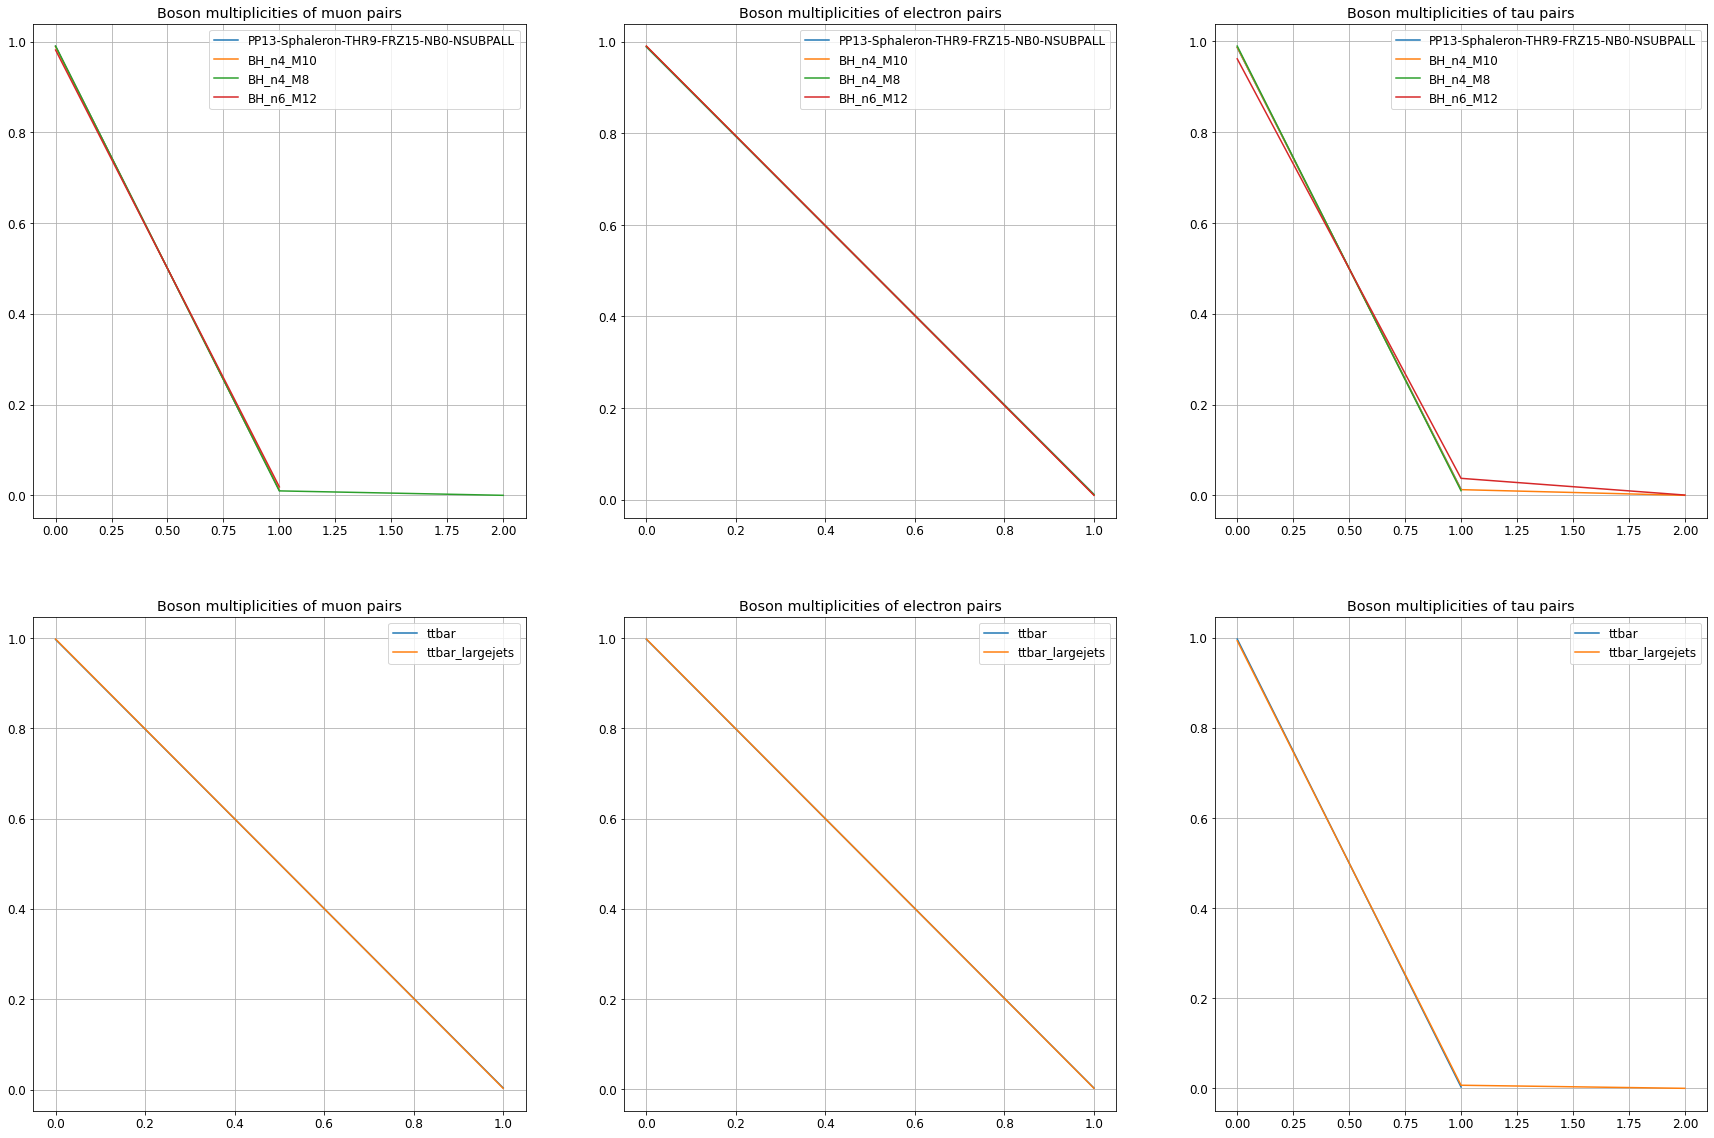

In [18]:
def orderDataSets():
    orderedDataSets = []
    for dataSet in dataSets:
      if dataSet.eventType == 'sphaleron':
        orderedDataSets.append(dataSet)
    for dataSet in dataSets:
      if dataSet.eventType != 'sphaleron':
        orderedDataSets.append(dataSet)
    return orderedDataSets

def zBosons():

  def getRelevantObjects(event):
    muons = []
    electrons = []
    taus = []

    for obj in event:
      cond1 = obj[colmapper['typ']] == objectMappingReverse['Muon']
      cond2 = obj[colmapper['typ']] == objectMappingReverse['Electron']
      cond3 = obj[colmapper['typ']] == objectMappingReverse['Tau']
      if not (cond1 or cond2 or cond3): continue

      # if cond1 == True: muons.append(obj)
      # if cond2 == True: electrons.append(obj)
      # if cond3 == True: taus.append(obj)

      if cond1: muons.append(np.array(obj))
      if cond2: electrons.append(np.array(obj))
      if cond3: taus.append(np.array(obj))
    muons = np.array(muons)
    electrons = np.array(electrons)
    taus = np.array(taus)
    # if len(muons) == 0: muons = None
    # if len(electrons) == 0: electrons = None
    # if len(taus) == 0: taus = None

    return muons, electrons, taus

  def getInvariantMass(objects):
    if len(objects) < 2: return 0  #None

    objectNtrk = objects[:,colmapper['ntrk']]
    objectCharges = objectNtrk > 0
    if objectCharges.all() or not objectCharges.any(): return 0  #None
    

    objectEnergies = objects[:,colmapper['pt']]
    positiveObjectEnergies = np.extract(objectCharges, objectEnergies)
    negativeObjectEnergies = np.extract(np.invert(objectCharges), objectEnergies)
    
    objectEtas = objects[:,colmapper['eta']]
    positiveObjectEtas = np.extract(objectCharges, objectEtas)
    negativeObjectEtas = np.extract(np.invert(objectCharges), objectEtas)

    objectPhis = objects[:,colmapper['phi']]
    positiveObjectPhis = np.extract(objectCharges, objectPhis)
    negativeObjectPhis = np.extract(np.invert(objectCharges), objectPhis)

    bosonsInvariantMass = []
    for i in range(min([len(positiveObjectEnergies), len(negativeObjectEnergies)])):
      posObjNrg = positiveObjectEnergies[-i]
      posObjEta = positiveObjectEtas[-i]
      posObjPhi = positiveObjectPhis[-i]
      negObjNrg = negativeObjectEnergies[-i]
      negObjEta = negativeObjectEtas[-i]
      negObjPhi = negativeObjectPhis[-i]
      invariantMassSquared = (2*posObjNrg*negObjNrg)*(math.cosh(posObjEta - negObjEta) - math.cos(posObjPhi - negObjPhi))

      if invariantMassSquared != None: invariantMass = math.sqrt(invariantMassSquared)
      bosonsInvariantMass.append(invariantMass)
    return np.array(bosonsInvariantMass)

  def checkCandidates(candidates):
    bosons = 0
    if len(candidates) == 0: return bosons
    if len(candidates) < 2:
      if candidates >= 91: bosons = 1; return bosons
    if len(candidates) >= 2:
      for candidate in candidates:
        if candidate >= 91: bosons += 1
    return bosons


  def zBosonsMultiplicityForDataSet(dataSet):

    zBosonsMuons = np.zeros(len(dataSet.data))
    zBosonsElectrons = np.zeros(len(dataSet.data))
    zBosonsTaus = np.zeros(len(dataSet.data))

    for i in range(len(dataSet.data)):
      objects = getRelevantObjects(dataSet.data[i])
      if objects == None: continue
      muons, electrons, taus = objects
      if np.any(muons):
        muonsBosonCandidates = getInvariantMass(muons)
        if np.any(muonsBosonCandidates):
          muonBosons = checkCandidates(muonsBosonCandidates)
          zBosonsMuons[i] = muonBosons
      if np.any(electrons):
        electronsBosonCandidates = getInvariantMass(electrons)
        if np.any(electronsBosonCandidates):
          electronBosons = checkCandidates(electronsBosonCandidates)
          zBosonsElectrons[i] = electronBosons
      if np.any(taus):
        tausBosonCandidates = getInvariantMass(taus)
        if np.any(tausBosonCandidates):
          tauBosons = checkCandidates(tausBosonCandidates)
          zBosonsTaus[i] = tauBosons
      
      zBosonsMuons = np.array(zBosonsMuons)
      zBosonsElectrons = np.array(zBosonsElectrons)
      zBosonsTaus = np.array(zBosonsTaus)
    zBosonsMultiplicity = np.array([zBosonsMuons, zBosonsElectrons, zBosonsTaus])
    return zBosonsMultiplicity

  def zBosonsInvariantMassForDataSet(dataSet):

    invariantMassMuons = []
    invariantMassElectrons = []
    invariantMassTaus = []

    for i in range(len(dataSet.data)):
      objects = getRelevantObjects(dataSet.data[i])
      if objects == None: continue
      muons, electrons, taus = objects
      if np.any(muons): invariantMassMuons.append(getInvariantMass(muons))
      if np.any(electrons): invariantMassElectrons.append(getInvariantMass(electrons))
      if np.any(taus): invariantMassTaus.append(getInvariantMass(taus))

    print(invariantMassMuons)
    print(f'invarMassMuons = {max(invariantMassMuons)}')

    return invariantMassMuons, invariantMassElectrons, invariantMassTaus

  def testGetRelevantObjects():
    dataSet = dataSets[0]
    countMuons = [0 for i in range(len(dataSet.data))]
    countElectrons = [0 for i in range(len(dataSet.data))]
    countTaus = [0 for i in range(len(dataSet.data))]
    for i, event in enumerate(dataSet.data):

      muons, electrons, taus = getRelevantObjects(event)
      if len(muons) != 0: countMuons[i] += len(muons);
      if len(electrons) != 0: countElectrons[i] += len(electrons)
      if len(taus) != 0: countTaus[i] += len(taus)
    
    return countMuons, countElectrons, countTaus

  def testInvariantMass():
    dataSet = dataSets[0]
    indexes = []
    countMuons, countElectrons, countTaus = testGetRelevantObjects()
    for i in range(len(countMuons)):
      if countMuons[i] > 1: indexes.append(i)
    randomIndex = random.choice(indexes)

    event = dataSet.data[randomIndex]
    print(event)
    muons, electrons, taus = getRelevantObjects(event)
    print(muons)


    invariantMassSquared = getInvariantMass(muons)
    print(invariantMassSquared)
    if invariantMassSquared:
      invariantMass = math.sqrt(invariantMassSquared)
      return invariantMass
    else: return None
  
  def countZBosons(zBosons):
    numbers = []
    counts = []
    for multiplicity in zBosons:
      number, count = np.unique(multiplicity, return_counts=True)
      numbers.append(number)
      count = normalizeObjectCounts(count)
      counts.append(count)
      
    return numbers, counts

  def zBosonsInvariantMassPrepareForPlot(zBosonsInvariantMass, maxVal):
    nrOfPoints = 100
    #maxInvariantMass = np.amax(bosonType)
    binLen = maxVal/nrOfPoints
    bins = np.arange(0,maxVal+binLen, binLen)
    yValues = []
    for bosonType in zBosonsInvariantMass:
      hist, binsa = np.histogram(zBosonsInvariantMass, bins)
      hist.append(yValues)
    return yValues, bins
      
  def allZBosonCountPlotData():

    numbers = []
    counts = []

    for dataSetIndex in range(len(dataSets)):
      zBosons = zBosonsMultiplicityForDataSet(dataSets[dataSetIndex])
      number, count = countZBosons(zBosons)
      numbers.append(number)
      counts.append(count)

    return np.array(numbers), np.array(counts)

      
  def allZBosonInvariantMass():
    zBosonsInvariantMasses = []
    for dataSetIndex in range(len(dataSets)):
      zBosonsInvariantMass = zBosonsInvariantMassForDataSet(orderedDataSets[dataSetIndex])
      zBosonsInvariantMasses.append(zBosonsInvariantMass)
    #zBosonsInvariantMasses = np.array(zBosonsInvariantMasses)
    # print(np.shape(zBosonsInvariantMasses))
    # print(zBosonsInvariantMasses)
    zBosonsYValues = []
    zBosonsBins = []

    # maxVal = 0
    # for dataSetIdx in range(np.size(zBosonsInvariantMasses, 0)):
    #   for objTypIdx in range(np.size(zBosonsInvariantMasses, 1)):
    #     if np.size(zBosonsInvariantMasses[dataSetIdx, objTypIdx]) > 1:
    #       for val in zBosonsInvariantMasses[dataSetIdx, objTypIdx]:
    #         if val > maxVal:
    #           maxVal = val

    #       # val = np.amax(zBosonsInvariantMasses[dataSetIdx, objTypIdx])
    #       # if maxVal < val:
    #       #   maxVal = val
    #     else:
    #       if zBosonsInvariantMasses[dataSetIdx, objTypIdx] > maxVal:
    #         maxVal = zBosonsInvariantMasses[dataSetIdx, objTypIdx]

    maxVal = np.amax(zBosonsInvariantMasses)
    for dataSetIndex in range(len(dataSets)):
      yValues, bins = zBosonsInvariantMassPrepareForPlot(zBosonsInvariantMass, maxVal)
      if len(zBosonsBins) == 0: zBosonsBins = bins
      zBosonsYValues.append(yValues)

    zBosonsYValues = np.array(zBosonsYValues)

    return zBosonsYValues, zBosonsBins

  def plotMultiplicities():
    ordering = ['muon', 'electron', 'tau']
    numbers, counts = allZBosonCountPlotData()

    nrOfPlotsPer = 4

    numberOfColumns = np.size(counts,1)
    numberOfRows = math.ceil(len(dataSets)/nrOfPlotsPer)
    fig = plt.figure(figsize=(numberOfColumns*10,numberOfRows*10))
    axs = fig.subplots(numberOfRows,numberOfColumns)
    
    for dataSetIndex in range(len(dataSets)):
      rowIndex = dataSetIndex//nrOfPlotsPer
      
      for columnIndex in range(numberOfColumns):
        if numberOfRows != 1:
          axs[rowIndex, columnIndex].plot(numbers[dataSetIndex,columnIndex], counts[dataSetIndex, columnIndex], label=f'{orderedDataSets[dataSetIndex].fileName}')
        else:
          axs[columnIndex].plot(numbers[dataSetIndex, columnIndex], counts[dataSetIndex, columnIndex], label=f'{orderedDataSets[dataSetIndex].fileName}')
    
    for rowIndex in range(numberOfRows):
      for columnIndex in range(numberOfColumns):
        if numberOfRows != 1:
          axs[rowIndex, columnIndex].set_title(f'Boson multiplicities of {ordering[columnIndex]} pairs')
          axs[rowIndex, columnIndex].grid()
          axs[rowIndex, columnIndex].legend()
        else:
          axs[columnIndex].set_title(f'Boson multiplicities of {ordering[columnIndex]} pairs')
          axs[columnIndex].grid()
          axs[columnIndex].legend()
    

  def plotInvariantMasses():
    ordering = ['muon', 'electron', 'tau']
    zBosonsYValues, zBosonsBins = allZBosonInvariantMass()
    xValsOffset = zBosonsBins[:-1]
    xVals = xValsOffset + (zBosonsBins[1] - zBosonsBins[0])/2

    nrOfPlotsPer = 4

    numberOfColumns = np.size(zBosonsYValues,1)
    numberOfRows = math.ceil(len(dataSets)/nrOfPlotsPer)
    fig = plt.figure(figsize=(numberOfColumns*10,numberOfRows*10))
    axs = fig.subplots(numberOfRows,numberOfColumns)

    for dataSetIndex in range(len(dataSets)):
      rowIndex = dataSetIndex//nrOfPlotsPer
      for columnIndex in range(numberOfColumns):
        if numberOfRows != 1:
          axs[rowIndex, columnIndex].plot(xVals, zBosonsYValues[dataSetIndex, columnIndex], label = f'{orderedDataSets[dataSetIndex].fileName}')
        else:
          axs[columnIndex].plot(xVals, zBosonsYValues[dataSetIndex, columnIndex], label = f'{orderedDataSets[dataSetIndex].fileName}')

    for rowIndex in range(numberOfRows):
      for columnIndex in range(numberOfColumns):
        if numberOfRows != 1:
          axs[rowIndex, columnIndex].set_title(f'Boson invariant mass of {ordering[columnIndex]} pairs')
          axs[rowIndex, columnIndex].grid()
          axs[rowIndex, columnIndex].legend()
        else:
          axs[columnIndex].set_title(f'Boson invariant mass of {ordering[columnIndex]} pairs')
          axs[columnIndex].grid()
          axs[columnIndex].legend()






  # countMuons, countElectrons, countTaus = testGetRelevantObjects()
  
  # zBosons = runZBosons()

  # zBosons = testInvariantMass()
  orderedDataSets = orderDataSets()
  plotMultiplicities()
  # plotInvariantMasses()
  
  
zBosons()


##MTE/PT

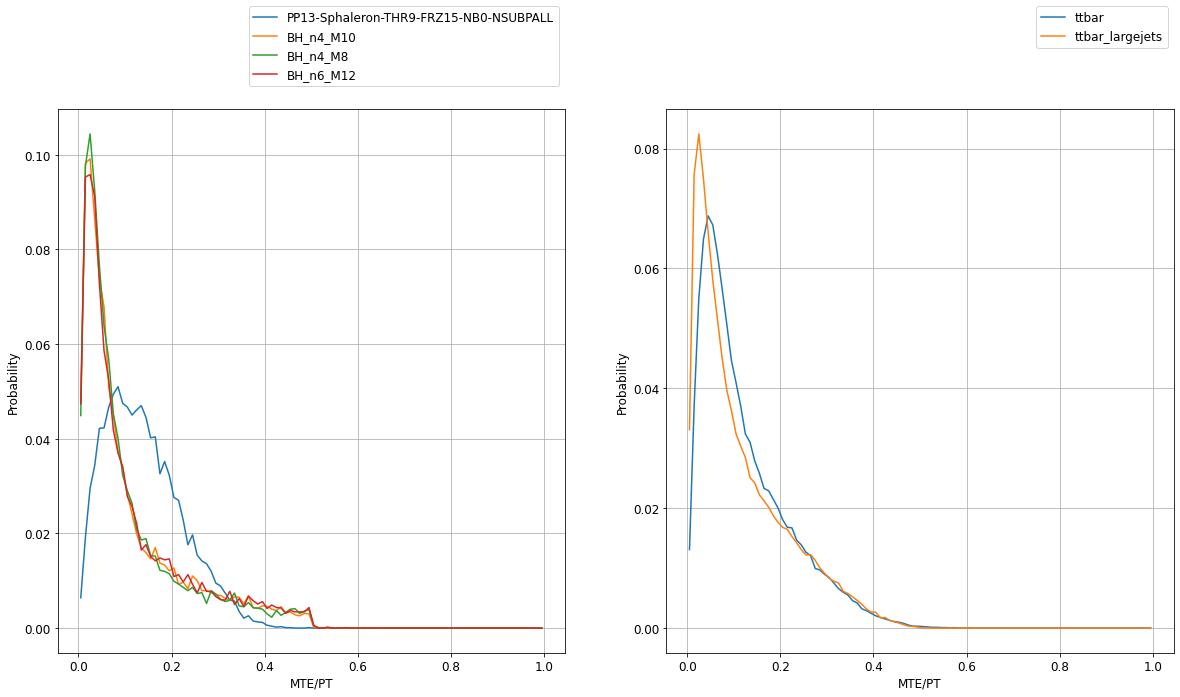

In [19]:

def MTEPTRatio(dataSet):
  objectTypes1 = [0, 1, 2, 3, 4, 6]
  objectTypes2 = [6]

  PTList1 = sumPTCustom(dataSet.data, objectTypes1)
  PTList2 = sumPTCustom(dataSet.data, objectTypes2)
  MTEPTRatio = []
  if not len(PTList1) == len(PTList2):
    print(f"Lengths of lists does not match: {dataSet.fileName}")
  else:
    for i in range(len(PTList1)):
      if PTList1[i] == 0:
        print(f"event {i} no PT {dataSet.fileName}")

      if PTList2[i] == 0:
        print(f"event {i} no MTE {dataSet.fileName}")
      
      if PTList1[i] == 0:
        ratio = 1
      else:
        ratio = PTList2[i]/PTList1[i]
      MTEPTRatio.append(ratio)
    MTEPTRatio = np.array(MTEPTRatio)
  return MTEPTRatio


def MTEPTRatioPlot():

  def orderDataSets():
    orderedDataSets = []
    for dataSet in dataSets:
      if dataSet.eventType == 'sphaleron':
        orderedDataSets.append(dataSet)
    for dataSet in dataSets:
      if dataSet.eventType != 'sphaleron':
        orderedDataSets.append(dataSet)
    return orderedDataSets

  def useSinglePlot():
    if len(orderedDataSets) > nrOfPlots: return False
    else: return True

  def MTEPTRatioArray():
    ratios = []
    for dataSetIdx in range(len(orderedDataSets)):
      ratios.append(MTEPTRatio(orderedDataSets[dataSetIdx]))
    # ratios = np.array(ratios)
    return ratios

  def bins():
    bins = np.arange(0,1.01,0.01)
    return bins

  def xValues():
    xValues = bins[:-1]
    xValues = xValues + xValues[1]/2
    return xValues

  def countRatios():
    counts = []
    for dataSetIdx in range(len(orderedDataSets)):
      countArr = []
      ratioArr = ratios[dataSetIdx]
      for i in range(len(bins)-1):
        condition1 = ratioArr > bins[i]
        condition2 = ratioArr < bins[i+1]
        condition = np.logical_and(condition1, condition2)
        count = np.count_nonzero(condition)
        countArr.append(count)
      countArr = np.array(countArr)
      counts.append(countArr)
    return counts

  def normCounts():
    normalizedCounts = []
    for dataSetIdx in range(len(orderedDataSets)):
      normalizedCounts.append(np.array(normalizeObjectCounts(counts[dataSetIdx])))
    # normalizedCounts = np.array(normalizedCounts)
    return normalizedCounts
  
  def createFigure():
    
    nrOfCols = math.ceil(len(dataSets)/nrOfPlots)
    fig = plt.figure(figsize=(nrOfCols*10,10))
    axs = fig.subplots(nrOfRows, nrOfCols)
    
    return fig, axs

  def fillAxs():

    if singlePlot:
      for dataSetIdx in range(len(orderedDataSets)):
        axs.plot(xValues, counts[dataSetIdx], label = orderedDataSets[dataSetIdx].fileName)
    else:
      for dataSetIdx in range(len(orderedDataSets)):
        axNr = math.floor(dataSetIdx/nrOfPlots)
        axs[axNr].plot(xValues, counts[dataSetIdx], label = orderedDataSets[dataSetIdx].fileName)

      

  def setYLim():
    for dataSetIdx in range(len(orderedDataSets)):
      maxCounts = np.amax(counts[dataSetIdx])
      
  def plotAxs():
    if singlePlot:
      axs.legend(bbox_to_anchor=(1, 1.2))
      axs.grid()
      axs.set_ylabel('Probability')
      axs.set_xlabel('MTE/PT')
    else:
      for ax in axs:
        ax.legend(bbox_to_anchor=(1, 1.2))
        ax.grid()
        ax.set_ylabel('Probability')
        ax.set_xlabel('MTE/PT')
    fig.show()

  

  nrOfRows = 1
  nrOfPlots = 4

  orderedDataSets = orderDataSets()
  singlePlot = useSinglePlot()
  ratios = MTEPTRatioArray()
  bins = bins()
  xValues = xValues()
  counts = countRatios()
  counts = normCounts()
  fig, axs = createFigure()
  filledAxs = fillAxs()
  setYLim()
  plotAxs()

MTEPTRatioPlot()

In [20]:
for dataSet in dataSets:
  if dataSet.fileName == "BH_n4_M12":
    
    print(dataSet.data[684])

##Eta Phi

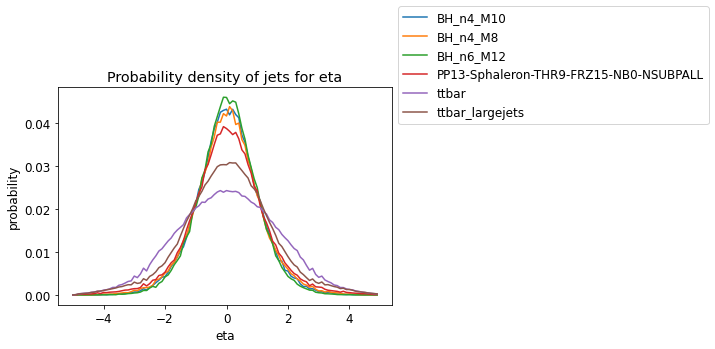

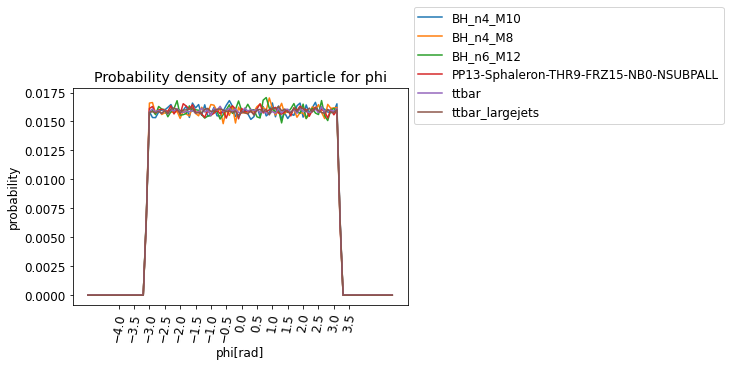

In [21]:
#Eta distribution of jets

def getAllEtas(dataSet):
  objectType = 4
  etaValues = []
  for matrix in dataSet.data:
    for obj in matrix:
      if obj[0] == objectType:
        etaValues.append(obj[colmapper["eta"]])
  return etaValues

def plotAllEtaNormalizedDist():
  etas = {} 
  bins = np.arange(-5.0, 5.0, 0.1)
  for dataSet in dataSets:
    hist, bins = np.histogram(getAllEtas(dataSet), bins)
    normalizedHist = normalizeObjectCounts(hist)
    plt.plot(bins, np.pad(normalizedHist, (1,0)), label = dataSet.fileName)
    plt.title('Probability density of jets for eta')
    plt.xlabel('eta')
    plt.grid()
    plt.ylabel('probability')

  #plt.legend(loc="upper left")
  plt.legend(bbox_to_anchor=(1, 1.4))
  plt.show()

#Phi distribution

def getAllPhis(dataSet):
  phiValues = []
  for matrix in dataSet.data:
    for obj in matrix:
        phiValues.append(obj[colmapper["phi"]])
  return phiValues

def plotAllPhiNormalizedDist():
  etas = {} 
  bins = np.arange(-5.0, 5.0, 0.1)
  for dataSet in dataSets:
    hist, bins = np.histogram(getAllPhis(dataSet), bins)
    normalizedHist = normalizeObjectCounts(hist)
    plt.plot(bins, np.pad(normalizedHist, (1,0)), label = dataSet.fileName)
    plt.grid()
    plt.xticks(np.arange(-4,4,0.5), rotation = 80)
    plt.xlabel('phi[rad]')
    plt.ylabel('probability')
    plt.title('Probability density of any particle for phi')
  plt.legend(bbox_to_anchor=(1, 1.4))
  plt.show()

plotAllEtaNormalizedDist()
plotAllPhiNormalizedDist()

In [22]:
def standardDeviance2D(etaValues):
  std = []
  for etaVals in etaValues:
    std.append(statistics.stdev(etaVals))
  return std

def mean2D(etaValues):
  mean = []
  for etaVals in etaValues:
    mean.append(statistics.mean(etaVals))
  return mean

#Imaging
per dataset:
  1. summer energi per objekt-type & plot i ett image per objekt-type
  2. finn maxval per objekt-type
  3. normaliser alle imager basert på maxval for sin objekt-type
  4. slå sammen imager for electron, muon og jets per event

In [23]:
def normalizeEnergyImages(objTypeToMaxVal, imageSet):
  normalizedImages = {}
  for imageKey in imageSet:                  
    filename, eventNr, objectType = imageKey
    image = imageSet[imageKey]
    currMaxVal = objTypeToMaxVal[objectType]
    for coord in image:
      x, y = coord
      image[(x, y)] = int(255*(image[(x, y)]/currMaxVal))
    normalizedImages[(imageKey)] = image
  return normalizedImages

In [24]:
def createEtaPhiBinnedImages(dataSet, 
                             imageHeight, 
                             imageWidth, 
                             maxEta, 
                             minEta, 
                             maxPhi, 
                             minPhi):
  objTypeToMaxVal = {}
  images = {}
  scalingFactorEta = imageWidth/(maxEta-minEta)
  scalingFactorPhi = imageHeight/(maxPhi-minPhi)
  for objectType in objectMapping:
    objTypeToMaxVal[objectType] = 0
  for i, event in enumerate(dataSet.data):
    totalPt = 0
    mte = 0

    for objectType in objectMapping:
      image = {}
      for obj in event:
        if int(obj[colmapper["typ"]]) != int(objectType) :
          continue
        if obj[colmapper["eta"]] < minEta or obj[colmapper["eta"]] > maxEta:
          continue
        eta = obj[colmapper["eta"]] + abs(minEta)
        convertedEta = max(0, round(eta*scalingFactorEta)-1) 

        phi = obj[colmapper["phi"]] + abs(minPhi)
        convertedPhi = max(0, round(phi*scalingFactorPhi)-1)

        pT = obj[colmapper["pt"]]
        energyP = pT*math.cosh(obj[colmapper["eta"]])

        image[(convertedEta, convertedPhi)] = energyP + image.get((convertedEta, convertedPhi), 0) 

        objTypeToMaxVal[objectType] = max(objTypeToMaxVal[objectType], image[(convertedEta, convertedPhi)] )

      images[(dataSet.fileName, i, objectType)] = image
  return (objTypeToMaxVal, images)

In [25]:
def fillBlanksInImage(sparseImage, height, width):
  newImage = [[ 0 for x in range(0,height)] for y in range(0,width)]
  for coord in sparseImage:
    x, y = coord
    newImage[x][y] = sparseImage[coord]
  return newImage

In [26]:
def mergeImages(height, width, redImage = {}, greenImage = {}, blueImage = {}):
    newImage = [[ (0, 0, 0) for x in range(0,height)] for y in range(0,width)]
    for coord in redImage:
      x, y = coord
      newImage[x][y] += (redImage[coord], 0, 0)
    for coord in greenImage:
      x, y = coord
      newImage[x][y] += (0, greenImage[coord], 0)
    for coord in blueImage:
      x, y = coord
      newImage[x][y] += (0, 0, blueImage[coord])
    return newImage

In [27]:
def mergeImageSparse(*dataChannels):
  channels = len(dataChannels)
  newImage = {}
  for idx, dataChannel in enumerate(dataChannels):
    for coord in dataChannel:
      res = [0] * channels
      res[idx] = dataChannel[coord] 
      res = tuple(res)
      newImage[coord] = tuple(map(lambda x, y: x + y, newImage.get(coord, tuple(0 for _ in range(channels))), res))
  return newImage

electron = red, muon = green, jet = blue

('BH_n4_M10', 0)
631


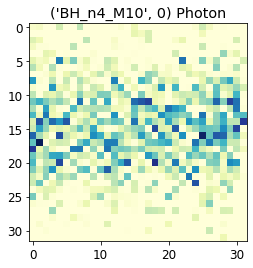

('BH_n4_M10', 1)
592


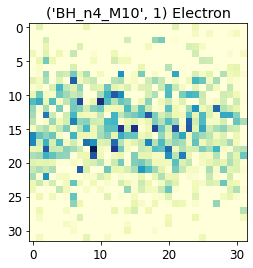

('BH_n4_M10', 2)
639


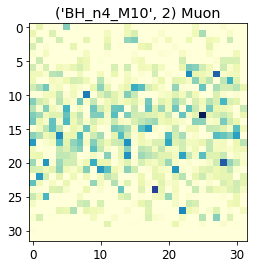

('BH_n4_M10', 3)
735


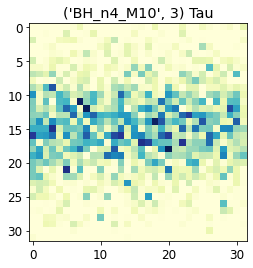

('BH_n4_M10', 4)
1023


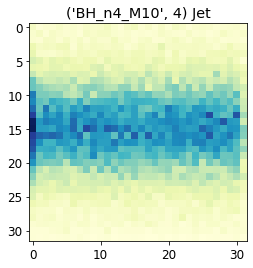

('BH_n4_M10', 6)
32


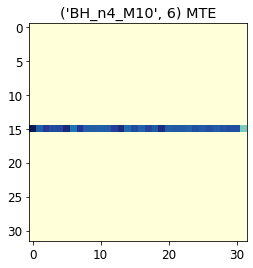

('BH_n4_M8', 0)
594


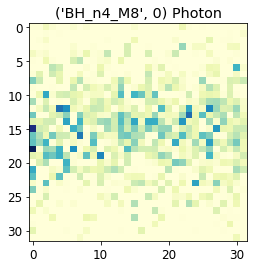

('BH_n4_M8', 1)
552


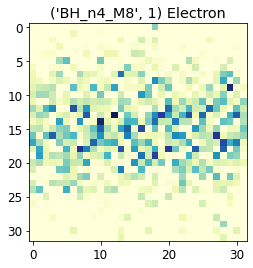

('BH_n4_M8', 2)
621


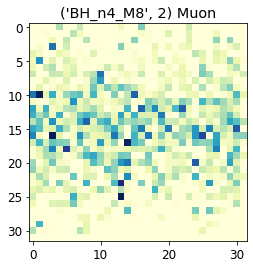

('BH_n4_M8', 3)
709


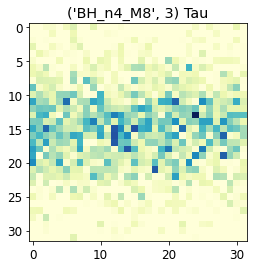

('BH_n4_M8', 4)
1023


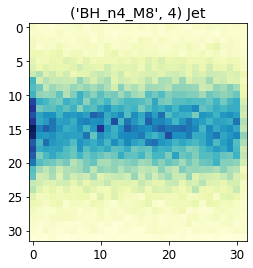

('BH_n4_M8', 6)
32


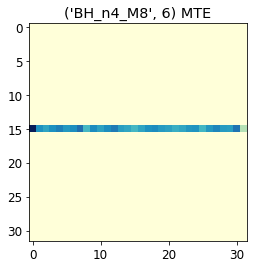

('BH_n6_M12', 0)
629


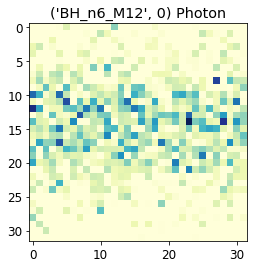

('BH_n6_M12', 1)
570


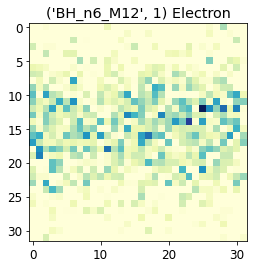

('BH_n6_M12', 2)
610


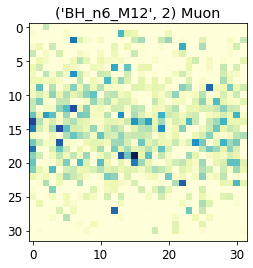

('BH_n6_M12', 3)
694


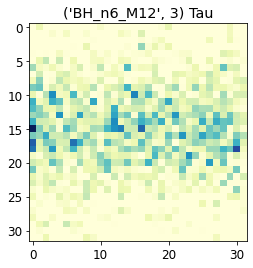

('BH_n6_M12', 4)
1023


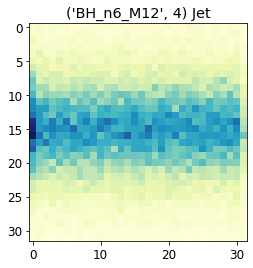

('BH_n6_M12', 6)
32


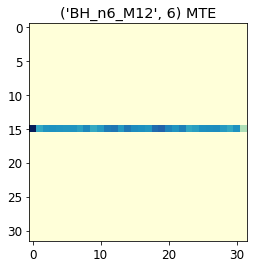

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 0)
675


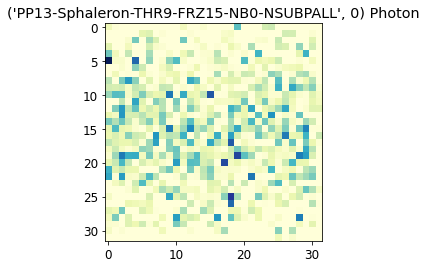

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 1)
816


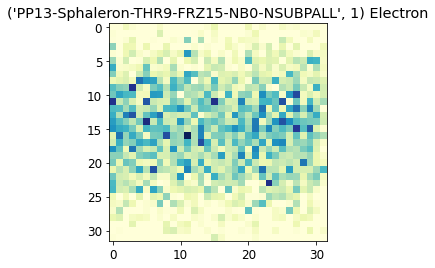

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 2)
881


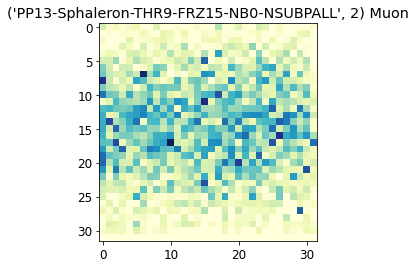

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 3)
866


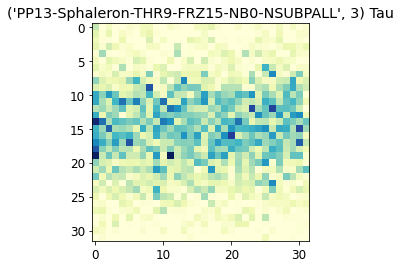

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 4)
1024


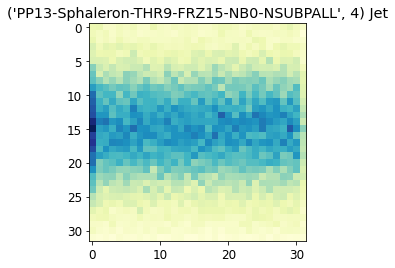

('PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL', 6)
32


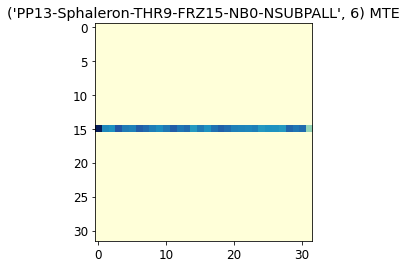

('ttbar', 0)
914


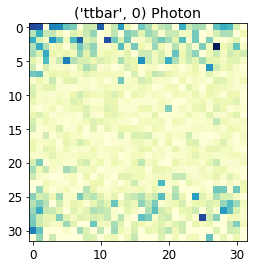

('ttbar', 1)
1019


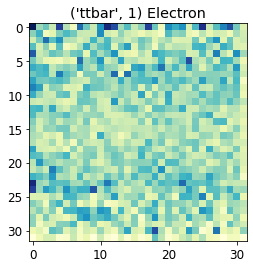

('ttbar', 2)
992


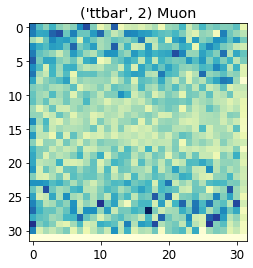

('ttbar', 3)
1021


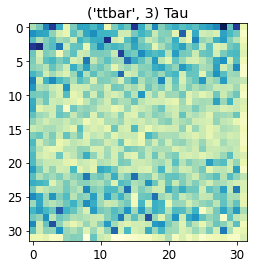

('ttbar', 4)
1024


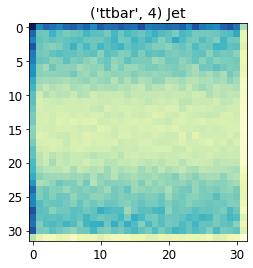

('ttbar', 6)
32


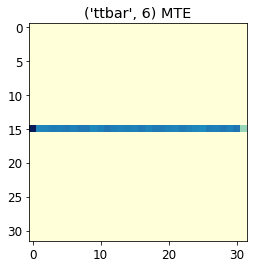

('ttbar_largejets', 0)
867


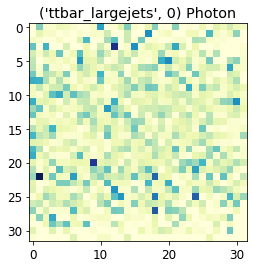

('ttbar_largejets', 1)
904


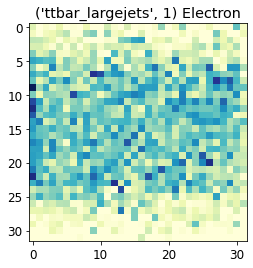

('ttbar_largejets', 2)
946


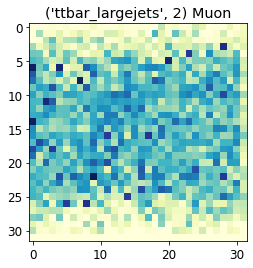

('ttbar_largejets', 3)
1003


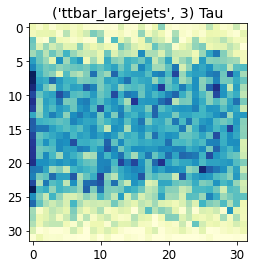

('ttbar_largejets', 4)
1024


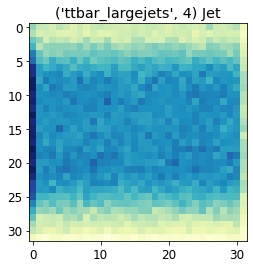

('ttbar_largejets', 6)
32


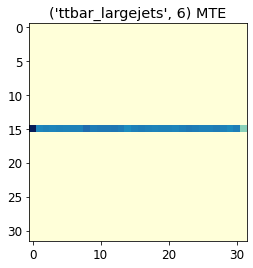

In [28]:
imageHeight = 32
imageWidth = 32
def createAllImages(imageHeight, imageWidth):
  images = {}
  eta2D = [getAllEtas(dataSet) for dataSet in dataSets]
  maxEta = 2.5 #*max(standardDeviance2D(eta2D))
  minEta = -2.5 #*max(standardDeviance2D(eta2D))
  maxPhi = 3.14
  minPhi = -3.14

  for dataSet in dataSets:
    (objTypeToMaxVal, binnedImages) = createEtaPhiBinnedImages(dataSet, imageHeight, imageWidth, maxEta, minEta, maxPhi, minPhi)
    normalizedImages = normalizeEnergyImages(objTypeToMaxVal, binnedImages)
    images.update(normalizedImages)
  return images

def mergeImagesByObjectTypeAndPlot(images, imageHeight, imageWidth):
  objectImages = {} # map fra (filename, objectType) til map fra (x, y) til energi
  for imageKey in images:
    filename, eventNr, objectType = imageKey
    image = images[imageKey]
    currentImageForObj = objectImages.get((filename, objectType), {})
    for coords in image:
      currentImageForObj[(coords)] = image[(coords)] + currentImageForObj.get((coords), 0)
    objectImages[(filename, objectType)] = currentImageForObj
  for imageKey in objectImages:
    filename, objectType = imageKey
    objectTypeHumanReadable = objectMapping[objectType]
    print(imageKey)
    print(len(objectImages[(imageKey)]))
    plt.title(f"{imageKey} {objectTypeHumanReadable}")
    plt.imshow(fillBlanksInImage(objectImages[(imageKey)], imageHeight, imageWidth))
    startEndX = [0, imageWidth-1]
    startEndY = [imageHeight/2, imageWidth/2]
    #plt.plot(startEndX, startEndY)
    plt.show()
    #print(objectImages[(imageKey)])

images = createAllImages(imageHeight, imageWidth)
mergeImagesByObjectTypeAndPlot(images, imageHeight, imageWidth)







In [29]:
mergedImageForDataSet = {}
for dataset in dataSets:
  mergedImages = []
  for idx, data in enumerate(dataset.data):
    electronImage= images.get((dataset.fileName, idx, objectMappingReverse["Electron"]), {})
    muonImage = images.get((dataset.fileName, idx, objectMappingReverse["Muon"]), {})
    jetsImage = images.get((dataset.fileName, idx, objectMappingReverse["Jet"]), {})
    #tauImage = images.get((dataset.fileName, idx, objectMappingReverse["Tau"]), {})
    #mteImage = images.get((dataset.fileName, idx, objectMappingReverse["MTE"]), {})
    #mergedImages.append(mergeImageSparse(electronImage, muonImage, jetsImage, tauImage, mteImage))
    mergedImages.append(mergeImageSparse(electronImage, muonImage, jetsImage))
  print(len(mergedImages))
  print(mergedImages[random.randrange(0, len(mergedImages))])
  mergedImageForDataSet[dataset.fileName] = mergedImages



9985
{(11, 12): (0, 0, 144), (19, 27): (0, 0, 146), (14, 0): (0, 0, 25), (21, 4): (0, 0, 21), (10, 23): (0, 0, 12), (16, 22): (0, 0, 6), (14, 26): (0, 0, 6), (3, 7): (0, 0, 8), (19, 24): (0, 0, 2), (16, 25): (0, 0, 1)}
9998
{(18, 12): (0, 0, 134), (11, 26): (0, 0, 89), (10, 3): (0, 0, 63), (17, 15): (0, 0, 40), (16, 27): (0, 0, 4), (13, 29): (0, 0, 2), (9, 6): (0, 0, 3), (5, 30): (0, 0, 5), (27, 4): (0, 0, 4), (29, 12): (0, 0, 5)}
9643
{(16, 24): (0, 0, 60), (8, 6): (0, 0, 67), (8, 10): (0, 0, 55), (25, 19): (0, 0, 67), (10, 9): (0, 0, 4), (12, 4): (0, 0, 1), (3, 26): (0, 0, 2)}
10000
{(12, 30): (0, 0, 85), (15, 0): (0, 0, 77), (18, 9): (0, 0, 26), (3, 20): (0, 0, 61), (12, 14): (0, 0, 17), (16, 3): (0, 0, 3), (19, 7): (0, 0, 2), (16, 5): (0, 0, 1)}
100000
{(28, 4): (0, 0, 39), (24, 17): (0, 0, 21), (18, 1): (0, 0, 3), (27, 22): (0, 0, 7)}
100000
{(27, 4): (0, 0, 60), (21, 22): (0, 0, 14), (23, 5): (0, 0, 15), (30, 21): (0, 0, 41), (24, 17): (0, 0, 14), (30, 1): (0, 0, 26), (25, 22): (

In [30]:
def getTensors(dataset):
  tensors = []
  for image in itertools.islice(mergedImageForDataSet[dataset.fileName], 0, 100):
    indexes = []
    values = []
    for key in image:
      x, y = key
      indexes.append([x, y])
      value = image[key]
      values.append(list(value))
    if len(values) != 0:
      s = torch.sparse_coo_tensor(torch.tensor(indexes).t(), values, (imageHeight, imageWidth, 3)).to_dense()
      tensors.append([s, dataset.fileName])
  return tensors

In [31]:
def get_x(r_in):
  r = r_in[0].cpu().detach().numpy()
  return TensorImage([r[:,:,0],r[:,:,1],r[:,:,2]])
def get_y(r): return r[1]



/usr/local/lib/python3.7/dist-packages/fastai/torch_core.py:131: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  else torch.tensor(x, **kwargs) if isinstance(x, (tuple,list))
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.317619,1.640666,0.755000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,2.152119,1.514346,0.770000,00:01
1,2.018767,1.578239,0.755000,00:01
2,1.893270,1.593802,0.755000,00:01
3,1.806360,1.670546,0.760000,00:01
4,1.667446,1.774586,0.760000,00:01
5,1.493052,1.774604,0.725000,00:01
6,1.369410,1.773655,0.750000,00:01
7,1.285490,1.788447,0.755000,00:01
8,1.197669,1.636679,0.710000,00:01
9,1.097850,1.527791,0.665000,00:01


/usr/local/lib/python3.7/dist-packages/fastai/interpret.py:88: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


epoch,train_loss,valid_loss,error_rate,time
0,2.188858,1.571949,0.755000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,2.255174,1.459948,0.740000,00:01
1,2.151456,1.492330,0.815000,00:01
2,2.014214,1.516532,0.825000,00:01
3,1.838799,1.477295,0.795000,00:01
4,1.639311,1.510895,0.800000,00:01
5,1.490010,1.667018,0.785000,00:01
6,1.383071,1.895415,0.780000,00:01
7,1.273776,1.897468,0.765000,00:01
8,1.181260,1.670816,0.720000,00:01
9,1.117195,1.489734,0.685000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,2.300337,1.649209,0.755000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,2.127637,1.474244,0.755000,00:01
1,1.988475,1.486480,0.755000,00:01
2,1.910918,1.506998,0.770000,00:01
3,1.773503,1.489702,0.770000,00:01
4,1.662215,1.396867,0.760000,00:01
5,1.513411,1.337341,0.640000,00:01
6,1.403612,1.400274,0.655000,00:01
7,1.302244,1.441941,0.665000,00:01
8,1.219819,1.423798,0.620000,00:01
9,1.152113,1.399176,0.575000,00:01


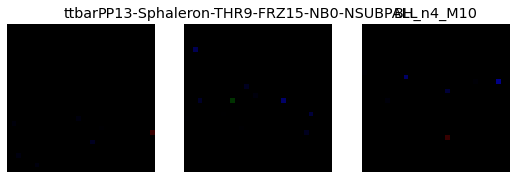

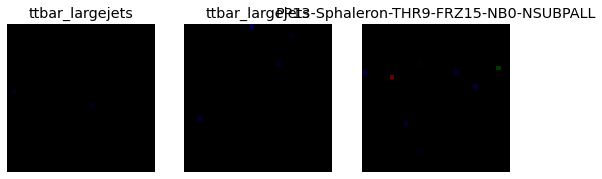

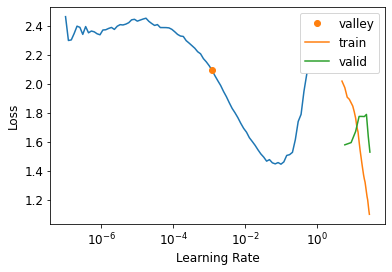

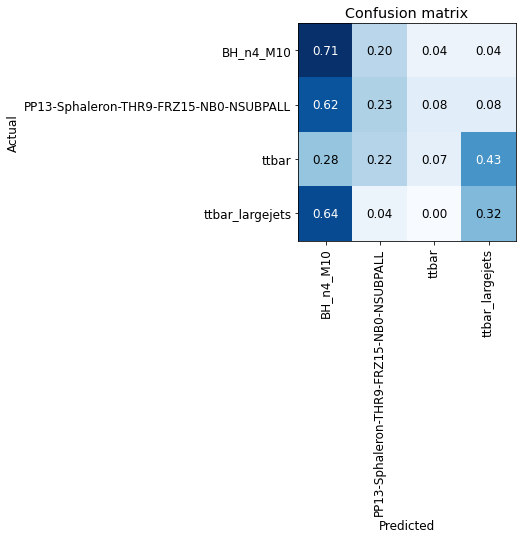

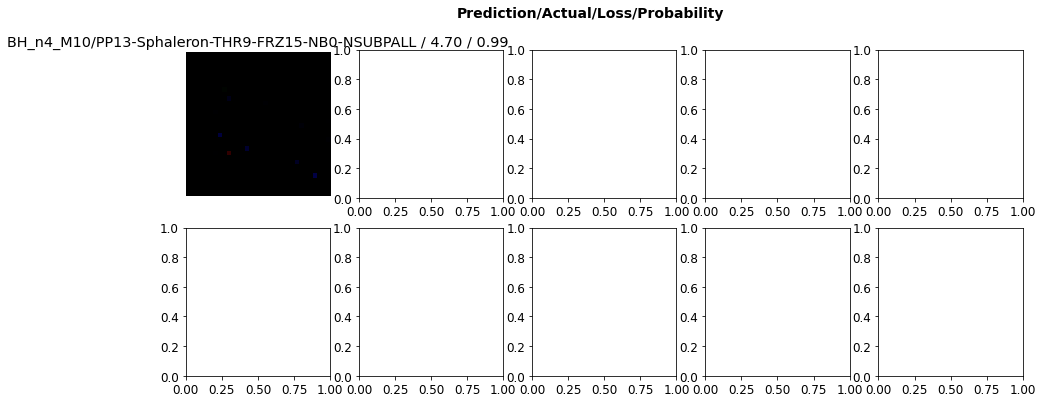

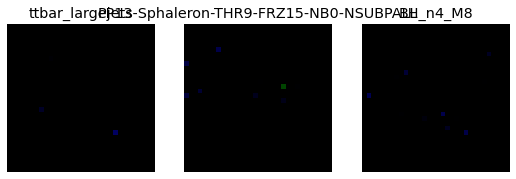

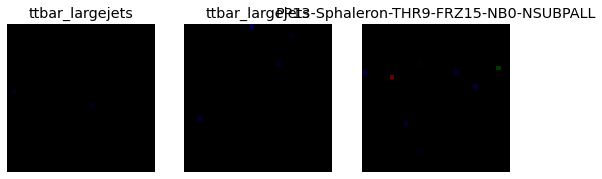

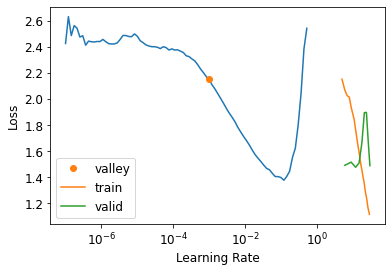

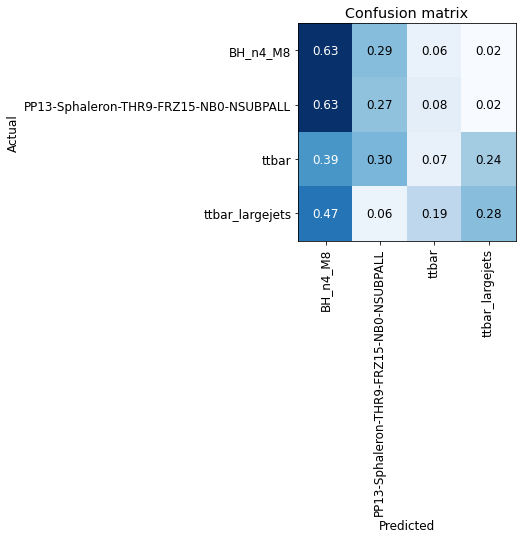

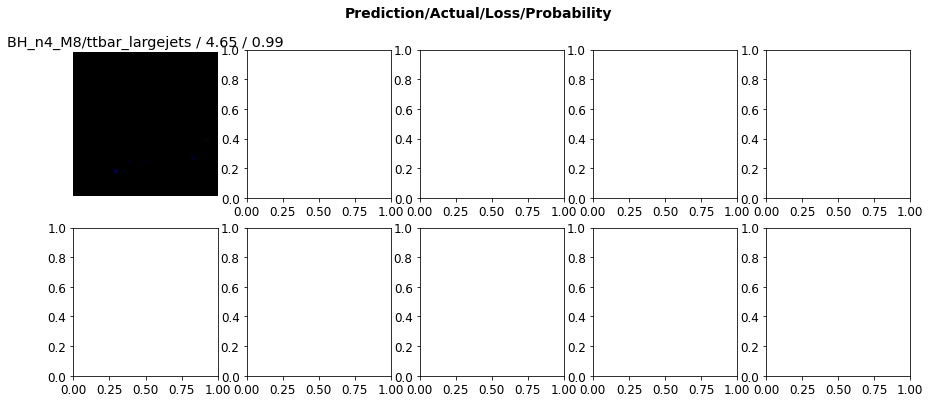

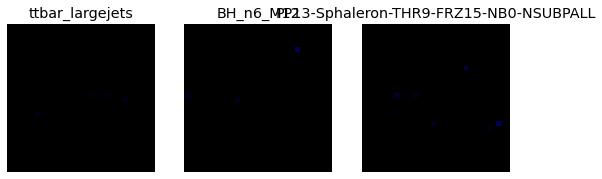

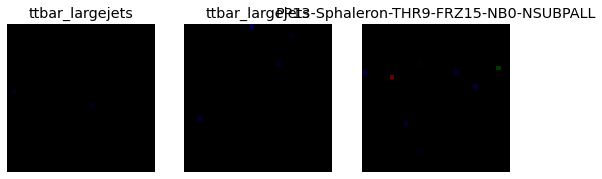

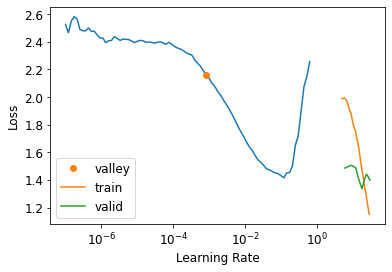

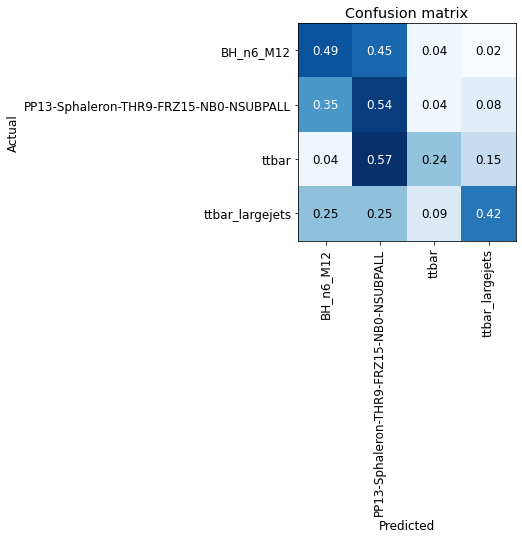

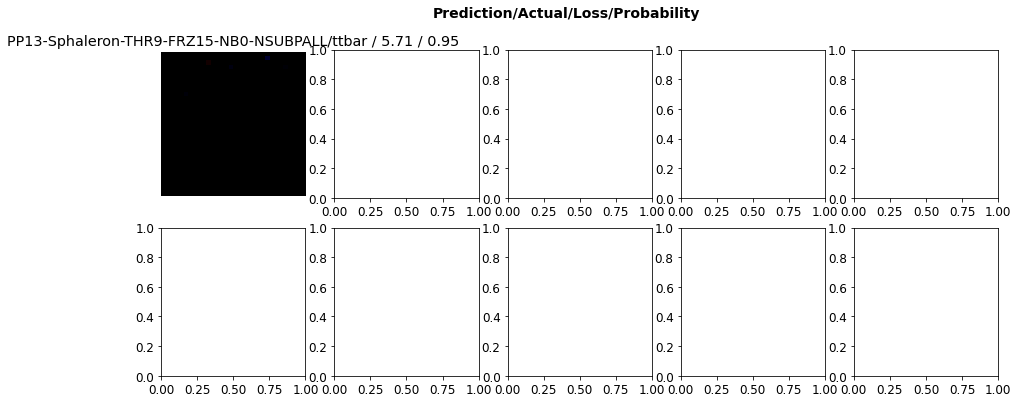

In [32]:
for dataset in dataSets:
  if dataset.eventType == "blackHole":
    tensors = []
    tensors.extend(getTensors(dataset))
    for otherDataset in dataSets:
      if otherDataset.eventType == "sphaleron" or otherDataset.eventType == "tt_":
        tensors.extend(getTensors(otherDataset))
    dblock = DataBlock( blocks = (ImageBlock, CategoryBlock),
                    get_x = get_x, 
                    get_y = get_y,
                    splitter = RandomSplitter(valid_pct=0.5, seed=41),
                  )
    dls = dblock.dataloaders(tensors)
    dls.train.show_batch(max_n=3)
    dls.valid.show_batch(max_n=3)
    dls.cuda()
    learn = cnn_learner(dls, resnet18, metrics=error_rate).to_fp16()
    learn.lr_find()
    learn.fine_tune(10, base_lr=1e-3, wd=0.7)
    learn.recorder.plot_loss()
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(normalize=True)
    interp.plot_top_losses(10, nrows=2)

In [33]:
# new_in_channels = 3
# resnetMultiChannel = models.resnet18(pretrained=false)
# 
# layer = resnetMultiChannel.conv1
#         
# # Creating new Conv2d layer
# new_layer = nn.Conv2d(in_channels=new_in_channels, 
#                   out_channels=layer.out_channels, 
#                   kernel_size=layer.kernel_size, 
#                   stride=layer.stride, 
#                   padding=layer.padding,
#                   bias=layer.bias)
# 
# copy_weights = 0 # Here will initialize the weights from new channel with the red channel weights
# 
# # Copying the weights from the old to the new layer
# new_layer.weight[:, :layer.in_channels, :, :] = layer.weight.clone()
# 
# #Copying the weights of the `copy_weights` channel of the old layer to the extra channels of the new layer
# for i in range(new_in_channels - layer.in_channels):
#     channel = layer.in_channels + i
#     new_layer.weight[:, channel:channel+1, :, :] = layer.weight[:, copy_weights:copy_weights+1, : :].clone()
# new_layer.weight = nn.Parameter(new_layer.weight)
# 
# resnetMultiChannel.conv1 = new_layer
